# IMDB Movie Analysis

# Importing Libraries

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Load Data

In [348]:
df=pd.read_csv(r'C:\Users\Muthusamy\Documents\PROJECTS-2023\10.IMDB_Movie_Analysis_Project\IMDB_Movies.csv')
df               

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...                 3054  English      USA           PG-13  237000000.0   
1     ...                 1238  English      USA           PG-13  300000000.0   
2     ...                  994  English       UK           PG-13  245000000.0   
3     ...                 2701  English      USA           PG-13  250000000.0   
4     ...                           NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
5038  ...                    6  English   Canada             NaN          NaN   
5039  ...                  359  English      USA           TV-14          NaN   
5040  ...                    3  English      USA             NaN       1400.0   
5041  ...                    9  English      USA           PG-13          NaN   
5042  ...                   84  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score aspect_ratio  \
0         2009.0                  936.0        7.9         1.78   
1         2007.0                 5000.0        7.1         2.35   
2         2015.0                  393.0        6.8         2.35   
3         2012.0                23000.0        8.5         2.35   
4            NaN                   12.0    

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [350]:
df.shape

(5043, 28)

In [351]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [352]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

# Pre-Processing

In [353]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

      ... num_user_for_reviews language  country  content_rating       budget  \
0     ...                 3054  English      USA           PG-13  237000000.0   
1     ...                 1238  English      USA           PG-13  300000000.0   
2     ...                  994  English       UK           PG-13  245000000.0   
3     ...                 2701  English      USA           PG-13  250000000.0   
4     ...                           NaN      NaN             NaN          NaN   
...   ...                  ...      ...      ...             ...          ...   
5038  ...                    6  English   Canada             NaN          NaN   
5039  ...                  359  English      USA           TV-14          NaN   
5040  ...                    3  English      USA             NaN       1400.0   
5041  ...                    9  English      USA           PG-13          NaN   
5042  ...                   84  English      USA              PG       1100.0   

      title_year actor_2_facebook_likes imdb_score aspect_ratio  \
0         2009.0                  936.0        7.9         1.78   
1         2007.0                 5000.0        7.1         2.35   
2         2015.0                  393.0        6.8         2.35   
3         2012.0                23000.0        8.5         2.35   
4            NaN                   12.0    

In [354]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [355]:
color_df=df[df['color'].isna()]
color_df

color        director_name  num_critic_for_reviews  duration  \
4      NaN          Doug Walker                     NaN       NaN   
279    NaN  Christopher Barnard                     NaN      22.0   
459    NaN                  NaN                    95.0      54.0   
1948   NaN      Lasse Hallström                   162.0     108.0   
2015   NaN    Mario Van Peebles                     7.0     100.0   
2459   NaN                  NaN                    14.0      60.0   
2753   NaN       Tung-Shing Yee                    53.0     119.0   
3272   NaN          David Hackl                    48.0      94.0   
3539   NaN         Richard Rich                     2.0      45.0   
3638   NaN           Wayne Wang                    56.0     104.0   
3656   NaN      Charles Matthau                    13.0      90.0   
4138   NaN          Darin Scott                     7.0      95.0   
4215   NaN        Zackary Adler                    10.0     110.0   
4331   NaN       Jonas Åkerlund                    33.0      96.0   
4409   NaN       John Stockwell                     2.0      90.0   
4441   NaN       Dave Rodriguez                     9.0      98.0   
4630   NaN      Jonathan Meyers                     1.0     111.0   
4846   NaN           Pece Dingo                     1.0      94.0   
5020   NaN      Brandon Landers                     NaN     143.0   

      director_facebook_likes  actor_3_facebook_likes         actor_2_name  \
4                       131.0                     NaN           Rob Walker   
279                       0.0                     NaN                  NaN   
459                       NaN                     0.0        Royce Johnson   
1948                    529.0                   690.0         Henry Thomas   
2015                    535.0                   399.0    Mario Van Peebles   
2459                      NaN                   405.0          Dylan Walsh   
2753                      3.0                    19.0            Daniel Wu   
3272                     43.0                   129.0     Michaela McManus   
3539                     24.0                    29.0         Kate Higgins   
3638                     61.0                   451.0         Russell Wong   
3656                    139.0                  1000.0    Michael Jai White   
4138                     39.0                   375.0    Shantel VanSanten   
4215                      0.0                   109.0         Kevin Leslie   
4331                     68.0                   722.0      Saffron Burrows   
4409                    134.0                   354.0           T.J. Storm   
4441                     11.0                   636.0     Michael Rapaport   
4630                      0.0                   426.0           Luke Perry   
4846                      0.0                    87.0  Wilhelm von Homburg   
5020                      8.0                     8.0      Alana Kaniewski   

      actor_1_facebook_likes       gross  \
4                      131.0         NaN   
279                      5.0         NaN   
459                    577.0         NaN   
1948                 17000.0  80014842.0   
2015                   668.0         NaN   
2459                   654.0         NaN   
2753                   556.0         NaN   
3272                   826.0         NaN   
3539                   122.0         NaN   
3638                   974.0   1346503.0   
3656                  2000.0         NaN   
4138                  1000.0         NaN   
4215                   490.0         NaN   
4331                  2000.0         NaN   
4409                260000.0         NaN   
4441                   979.0         NaN   
4630                   657.0         NaN   
4846                   156.0         NaN   
5020                   720.0         NaN   

                                                 genres  ...  \
4                                           Documentary  ...   
279                                              Comed

# Handling Null Values

In [356]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [357]:
df.dropna(subset=['director_name'],inplace=True)

In [358]:
df.dropna(subset=['actor_1_name'],inplace=True)

In [359]:
df.dropna(subset=['actor_2_name'],inplace=True)

In [360]:
df.dropna(subset=['actor_3_name'],inplace=True)

In [361]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews        41
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        776
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                138
movie_imdb_link                0
num_user_for_reviews          15
language                      11
country                        1
content_rating               254
budget                       391
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 303
movie_facebook_likes           0
dtype: int64

### Language

In [362]:
df[df['language'].isna()]

color        director_name  num_critic_for_reviews  duration  \
2895             Color  Jean-Jacques Annaud                    62.0     100.0   
3086             Color     Christopher Cain                    43.0     111.0   
3539               NaN         Richard Rich                     2.0      45.0   
3869             Color           Mel Brooks                    39.0      87.0   
3931             Color           Ron Fricke                   115.0     102.0   
4110             Color   Michael Landon Jr.                     5.0      87.0   
4409               NaN       John Stockwell                     2.0      90.0   
4630               NaN      Jonathan Meyers                     1.0     111.0   
4810   Black and White        D.W. Griffith                    69.0     123.0   
4885   Black and White           King Vidor                    48.0     151.0   
4958   Black and White    Harry F. Millarde                     1.0     110.0   

      director_facebook_likes  actor_3_facebook_likes  \
2895                    218.0                    91.0   
3086                     58.0                   258.0   
3539                     24.0                    29.0   
3869                      0.0                   753.0   
3931                    330.0                     0.0   
4110                     84.0                   331.0   
4409                    134.0                   354.0   
4630                      0.0                   426.0   
4810                    204.0                     9.0   
4885                     54.0                     6.0   
4958                      0.0                     0.0   

                      actor_2_name  actor_1_facebook_likes      gross  \
2895                Everett McGill                   581.0        NaN   
3086                Taylor Handley                   482.0  1066555.0   
3539                  Kate Higgins                   122.0        NaN   
3869                   Dom DeLuise                   898.0        NaN   
3931  Balinese Tari Legong Dancers                    48.0  2601847.0   
4110                    Kevin Gage                   702.0   252726.0   
4409                    T.J. Storm                260000.0        NaN   
4630                    Luke Perry                   657.0        NaN   
4810                     Mae Marsh                   436.0        NaN   
4885                  Renée Adorée                    81.0        NaN   
4958                Johnnie Walker                     2.0  3000000.0   

                                                 genres  ...  \
2895                            Adventure|Drama|History  ...   
3086                      Drama|History|Romance|Western  ...   
3539  Action|Adventure|Animation|Comedy|Drama|Family...  ...   
3869                                     Comedy|Romance  ...   
3931                                  Documentary|Music  ...   
4110                               Drama|Family|Western  ...   
4409                                             Action  ...   
4630                                              Drama  ...   
4810                                  Drama|History|War  ...   
4885                                  Drama|Romance|War  ...   
4958                                        Crime|Drama  ...   

     num_user_for_reviews language  country  content_rating      budget  \
2895                   96      NaN   Canada               R  12500000.0   
3086                  111      NaN      USA               R  11000000.0   
3539                    6      NaN      USA             NaN   7000000.0   
3869                   61      NaN      USA              PG   4400000.0   
3931                   69      NaN      USA           PG-13   4000000.0   
4110                   18      NaN      USA              PG   3000000.0   
4409                    1      NaN      USA             NaN  17000000.0   
4630                    1      NaN      USA              PG   1000000.0   
4810                   88      NaN    

In [363]:
df['language'].replace(np.nan,'English',inplace=True)

In [364]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews        41
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        776
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                138
movie_imdb_link                0
num_user_for_reviews          15
language                       0
country                        1
content_rating               254
budget                       391
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 303
movie_facebook_likes           0
dtype: int64

### Country

In [365]:
df[df['country'].isna()]

color      director_name  num_critic_for_reviews  duration  \
4021  Color  Daniel Petrie Jr.                     9.0      88.0   

      director_facebook_likes  actor_3_facebook_likes actor_2_name  \
4021                     19.0                   322.0   Jeff Fahey   

      actor_1_facebook_likes  gross          genres  ... num_user_for_reviews  \
4021                   795.0    NaN  Drama|Thriller  ...                   13   

     language  country  content_rating     budget  title_year  \
4021  English      NaN             NaN  3500000.0      2014.0   

     actor_2_facebook_likes imdb_score aspect_ratio movie_facebook_likes  
4021                  535.0        4.8         2.35                  570  

[1 rows x 28 columns]

In [366]:
df['country'].replace(np.nan,'USA',inplace=True)

In [367]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews        41
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        776
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                138
movie_imdb_link                0
num_user_for_reviews          15
language                       0
country                        0
content_rating               254
budget                       391
title_year                     2
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 303
movie_facebook_likes           0
dtype: int64

### Title Year

In [368]:
df[df['title_year'].isna()]

color      director_name  num_critic_for_reviews  duration  \
2765  Color     John Blanchard                     NaN      65.0   
2870  Color  Niels Arden Oplev                     NaN      88.0   

      director_facebook_likes  actor_3_facebook_likes   actor_2_name  \
2765                      0.0                   176.0  Andrea Martin   
2870                     76.0                    75.0   David Dencik   

      actor_1_facebook_likes  gross                         genres  ...  \
2765                   770.0    NaN                         Comedy  ...   
2870                   690.0    NaN  Action|Crime|Mystery|Thriller  ...   

     num_user_for_reviews language  country  content_rating budget  \
2765                  NaN  English   Canada             NaN    NaN   
2870                  NaN  Swedish   Sweden             NaN    NaN   

      title_year actor_2_facebook_likes imdb_score aspect_ratio  \
2765         NaN                  179.0        9.5         1.33   
2870         NaN                   94.0        8.1          NaN   

     movie_facebook_likes  
2765                    0  
2870                   22  

[2 rows x 28 columns]

In [369]:
df.dropna(subset=['title_year'],inplace=True)

### Num_critic_for_reviews

In [370]:
df['num_critic_for_reviews'].value_counts()

num_critic_for_reviews
1.0      38
81.0     33
16.0     32
5.0      32
10.0     30
         ..
765.0     1
738.0     1
476.0     1
775.0     1
409.0     1
Name: count, Length: 527, dtype: int64

In [371]:
df['num_critic_for_reviews']=df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())

In [372]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews         0
duration                      11
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        774
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews          13
language                       0
country                        0
content_rating               252
budget                       389
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 302
movie_facebook_likes           0
dtype: int64

### Duration


In [373]:
df['duration'].value_counts()

duration
90.0     160
100.0    141
101.0    139
98.0     135
97.0     130
        ... 
236.0      1
270.0      1
227.0      1
69.0       1
60.0       1
Name: count, Length: 170, dtype: int64

In [374]:
df['duration']=df['duration'].fillna(df['duration'].median())

In [375]:
df['aspect_ratio'].value_counts()

aspect_ratio
2.35     2356
1.85     1901
1.37       98
1.78       90
1.66       63
1.33       42
2.20       15
2.39       15
16.00      12
2.00        4
2.76        3
1.75        3
2.40        3
1.50        2
2.55        2
1.77        1
1.18        1
1.44        1
1.20        1
2.24        1
1.89        1
Name: count, dtype: int64

### Aspect Ratio

In [376]:
df[df['aspect_ratio'].isna()]

color     director_name  num_critic_for_reviews  duration  \
84    Color      Roland Joffé                    10.0     109.0   
199   Color        Matt Birch                     1.0     104.0   
206   Color        Matt Birch                     4.0     104.0   
507   Color  Andrés Couturier                     3.0      89.0   
624   Color         Will Finn                    51.0      88.0   
...     ...               ...                     ...       ...   
5034  Color  Neill Dela Llana                    35.0      80.0   
5036  Color   Anthony Vallone                   112.0      84.0   
5037  Color      Edward Burns                    14.0      95.0   
5038  Color       Scott Smith                     1.0      87.0   
5040  Color  Benjamin Roberds                    13.0      76.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
84                      596.0                   283.0       Alice Englert   
199                       0.0                   159.0         Dave Legeno   
206                       0.0                  1000.0          Toby Jones   
507                       0.0                    20.0       David Hoffman   
624                       6.0                   854.0        Oliver Platt   
...                       ...                     ...                 ...   
5034                      0.0                     0.0     Edgar Tancangco   
5036                      2.0                     2.0      John Considine   
5037                      0.0                   133.0  Caitlin FitzGerald   
5038                      2.0                   318.0       Daphne Zuniga   
5040                      0.0                     0.0       Maxwell Moody   

      actor_1_facebook_likes      gross  \
84                     622.0        NaN   
199                  10000.0        NaN   
206                  10000.0        NaN   
507                    163.0        NaN   
624                   2000.0  8460990.0   
...                      ...        ...   
5034                     0.0    70071.0   
5036                    45.0        NaN   
5037                   296.0     4584.0   
5038                   637.0        NaN   
5040                     0.0        NaN   

                                          genres  ... num_user_for_reviews  \
84               Action|Adventure|Romance|Sci-Fi  ...                   15   
199                               Action|Fantasy  ...                    2   
206                                      Fantasy  ...                    2   
507                             Animation|Family  ...                    1   
624   Adventure|Animation|Family|Fantasy|Musical  ...                   54   
...                                          ...  ...                  ...   
5034                                    Thriller  ...                   35   
5036                                 Crime|Drama  ...                    1   
5037                                Comedy|Drama  ...                   14   
5038                                Comedy|Drama  ...                    6   
5040                       Drama|Horror|Thriller  ...                    3   

     language      country  content_rating      budget  title_year  \
84    English      Belgium               R         NaN      2015.0   
199   English           UK             NaN         NaN      2011.0   
206   English           UK             NaN         NaN      2010.0   
507   Spanish       Mexico              PG   8000000.0      2015.0   
624   English          USA              PG  70000000.0      2013.0   
...       ...          ...             ...         ...         ...   
5034  English  Philippines       Not Rated      7000.0      2005.0   
5036  English          USA           PG-13      3250.0      2005.0   
5037  English          USA       Not Rated      9000.0      2011.0   
5038  English       Canada             NaN         NaN      2013.0   
5040  English          USA             NaN      1400

In [377]:
df['aspect_ratio']=df['aspect_ratio'].fillna(df['aspect_ratio'].median())

In [378]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        774
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews          13
language                       0
country                        0
content_rating               252
budget                       389
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### Num_user_for_reviews

In [379]:
df['num_user_for_reviews'].value_counts()

num_user_for_reviews
1       49
3       32
26      31
2       30
10      27
        ..
1065     1
1344     1
1401     1
1206     1
586      1
Name: count, Length: 954, dtype: int64

In [380]:
df['num_user_for_reviews']=df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())

In [381]:
df['facenumber_in_poster'].value_counts()

facenumber_in_poster
0.0     2099
1.0     1221
2.0      699
3.0      373
4.0      198
5.0      109
6.0       75
7.0       48
8.0       34
9.0       17
10.0      10
15.0       6
11.0       5
12.0       4
13.0       2
31.0       1
14.0       1
19.0       1
43.0       1
Name: count, dtype: int64

### Facenumber_in_poster

In [382]:
df['facenumber_in_poster']=df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mean())

In [383]:
df.isna().sum()

color                         15
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        774
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                136
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating               252
budget                       389
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### Plot Keywords

In [384]:
print(df['plot_keywords'].dtype)
df['plot_keywords'].value_counts()


object


plot_keywords
based on novel                                                                        4
1940s|child hero|fantasy world|orphan|reference to peter pan                          3
one word title                                                                        3
eighteen wheeler|illegal street racing|truck|trucker|undercover cop                   3
animal name in title|ape abducts a woman|gorilla|island|king kong                     3
                                                                                     ..
boxer|boxing training|death of wife|male in shower|rage                               1
evil|fight|hell|psychic|psychologist                                                  1
hit by a pickup truck|immortality|paramedic|resuscitation|san francisco california    1
africa|eyeglasses|money|texas|veteran                                                 1
actress name in title|crush|date|four word title|video camera                         1
Name: count, Lengt

In [385]:
df.dropna(subset=['plot_keywords'],inplace=True)

In [386]:
df.isna().sum()

color                         11
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        676
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating               186
budget                       363
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### Content Rating

In [387]:
df['content_rating'].value_counts()

content_rating
R            2087
PG-13        1445
PG            686
G             110
Not Rated     103
Unrated        61
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           2
Name: count, dtype: int64

In [388]:
df['content_rating']=df['content_rating'].replace(np.nan,'Approved')

In [389]:
df.isna().sum()

color                         11
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        676
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                       363
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### Gross

In [390]:
df['gross'].value_counts()

gross
177343675.0    3
218051260.0    3
144512310.0    3
3000000.0      3
47000000.0     3
              ..
55802754.0     1
55291815.0     1
83299761.0     1
48169908.0     1
85222.0        1
Name: count, Length: 3983, dtype: int64

In [391]:
df['gross']=df['gross'].fillna(df['gross'].mean())

### Budget

In [392]:
df['budget'].value_counts()

budget
20000000.0    173
25000000.0    141
30000000.0    141
15000000.0    140
10000000.0    130
             ... 
10818775.0      1
13800000.0      1
12305523.0      1
12600000.0      1
1100.0          1
Name: count, Length: 431, dtype: int64

In [393]:
df['budget']=df['budget'].fillna(df['budget'].mean())

In [394]:
df.isna().sum()

color                        11
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          0
plot_keywords                 0
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

### Color

In [395]:
df['color'].value_counts()

color
Color               4567
 Black and White     203
Name: count, dtype: int64

In [396]:
df.dropna(subset=['color'],inplace=True)

In [397]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [398]:
a = df.duplicated().sum()
print("Total Duplicated datapoints: ",a)

Total Duplicated datapoints:  43


In [399]:
df.drop_duplicates(inplace=True)

In [400]:
a = df.duplicated().sum()
print("Total Duplicated datapoints: ",a)

Total Duplicated datapoints:  0


In [401]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5035  Color   Robert Rodriguez                    56.0      81.0   
5036  Color    Anthony Vallone                   112.0      84.0   
5037  Color       Edward Burns                    14.0      95.0   
5038  Color        Scott Smith                     1.0      87.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0                  1000.0       Orlando Bloom   
2                         0.0                   161.0        Rory Kinnear   
3                     22000.0                 23000.0      Christian Bale   
5                       475.0                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
5035                      0.0                     6.0     Peter Marquardt   
5036                      2.0                     2.0      John Considine   
5037                      0.0                   133.0  Caitlin FitzGerald   
5038                      2.0                   318.0       Daphne Zuniga   
5042                     16.0                    16.0    Brian Herzlinger   

      actor_1_facebook_likes         gross  \
0                     1000.0  7.605058e+08   
1                    40000.0  3.094042e+08   
2                    11000.0  2.000742e+08   
3                    27000.0  4.481306e+08   
5                      640.0  7.305868e+07   
...                      ...           ...   
5035                   121.0  2.040920e+06   
5036                    45.0  4.906555e+07   
5037                   296.0  4.584000e+03   
5038                   637.0  4.906555e+07   
5042                    86.0  8.522200e+04   

                                   genres  ... num_user_for_reviews language  \
0         Action|Adventure|Fantasy|Sci-Fi  ...                 3054  English   
1                Action|Adventure|Fantasy  ...                 1238  English   
2               Action|Adventure|Thriller  ...                  994  English   
3                         Action|Thriller  ...                 2701  English   
5                 Action|Adventure|Sci-Fi  ...                  738  English   
...                                   ...  ...                  ...      ...   
5035  Action|Crime|Drama|Romance|Thriller  ...                  130  Spanish   
5036                          Crime|Drama  ...                    1  English   
5037                         Comedy|Drama  ...                   14  English   
5038                         Comedy|Drama  ...                    6  English   
5042                          Documentary  ...                   84  English   

      country  content_rating        budget  title_year  \
0         USA           PG-13  2.370000e+08      2009.0   
1         USA           PG-13  3.000000e+08      2007.0   
2          UK           PG-13  2.450000e+08      2015.0   
3         USA           PG-13  2.500000e+08      2012.0   
5         USA           PG-13  2.637000e+08      2012.0   
...       ...             ...           ...         ...   
5035      USA               R  7.000000e+03      1992.0   
5036      USA           PG-13  3.250000e+03      2005.0   
5037      USA       Not Rated  9.000000e+03      2011.0   
5038   Canada        Approved  4.071832e+07      2013.0   
5042      USA              PG  1.100000e+03      2004.0   

     actor_2_facebook_likes imdb_score as

In [402]:
orginal_rows = 5043
current_rows = 4727

print((f'Number of rows dropped: {orginal_rows - current_rows}'))


Number of rows dropped: 316


# Changing Datatypes

In [403]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [404]:
df['num_critic_for_reviews']=df['num_critic_for_reviews'].astype('int')
df['director_facebook_likes']=df['director_facebook_likes'].astype('int')
df['actor_3_facebook_likes']=df['actor_3_facebook_likes'].astype('int')
df['actor_1_facebook_likes']=df['actor_1_facebook_likes'].astype('int')
df['facenumber_in_poster']=df['facenumber_in_poster'].astype('int')
df['title_year']=df['title_year'].astype('int')
df['actor_2_facebook_likes']=df['actor_2_facebook_likes'].astype('int')
df['imdb_score']=df['imdb_score'].astype('int')
df['num_user_for_reviews']=df['num_user_for_reviews'].astype('int')


In [405]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews         int32
duration                     float64
director_facebook_likes        int32
actor_3_facebook_likes         int32
actor_2_name                  object
actor_1_facebook_likes         int32
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster           int32
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews           int32
language                      object
country                       object
content_rating                object
budget                       float64
title_year                     int32
actor_2_facebook_likes         int32
imdb_score                     int32
aspect_ratio                 float64
m

# EDA - Exploratory Data Analysis

## Features Distribution

In [406]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = df[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("pastel",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

# Categorical Features

### UNIVARIATE ANALYSIS

In [407]:
cat_col=['color','language','country','content_rating']

In [408]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

color
Color               4526
 Black and White     201
Name: count, dtype: int64


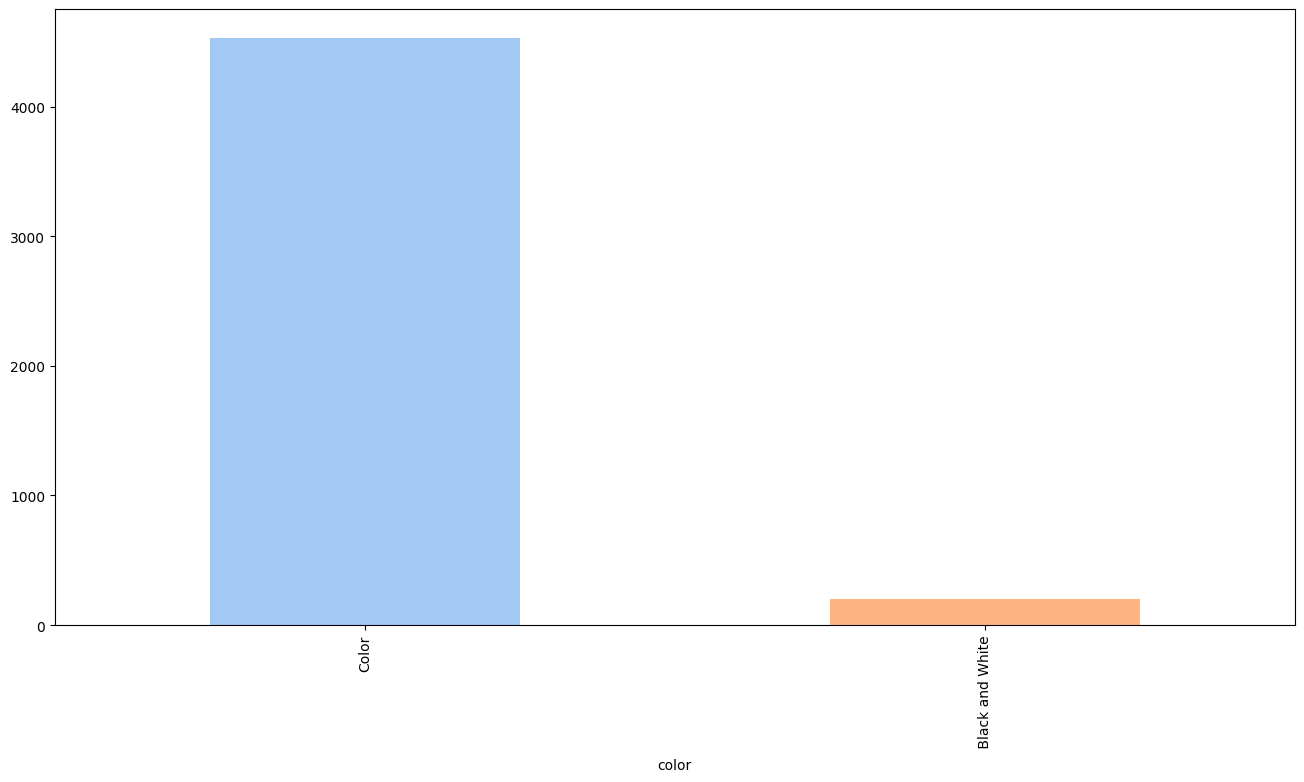

language
English       4438
French          69
Spanish         35
Hindi           26
Mandarin        23
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Arabic           3
Thai             3
Aboriginal       2
Indonesian       2
Zulu             2
Dari             2
Hungarian        1
Kazakh           1
Icelandic        1
Maya             1
Bosnian          1
Filipino         1
Czech            1
Telugu           1
Polish           1
Dzongkha         1
Vietnamese       1
Aramaic          1
Urdu             1
Romanian         1
Mongolian        1
Greek            1
Name: count, dtype: int64


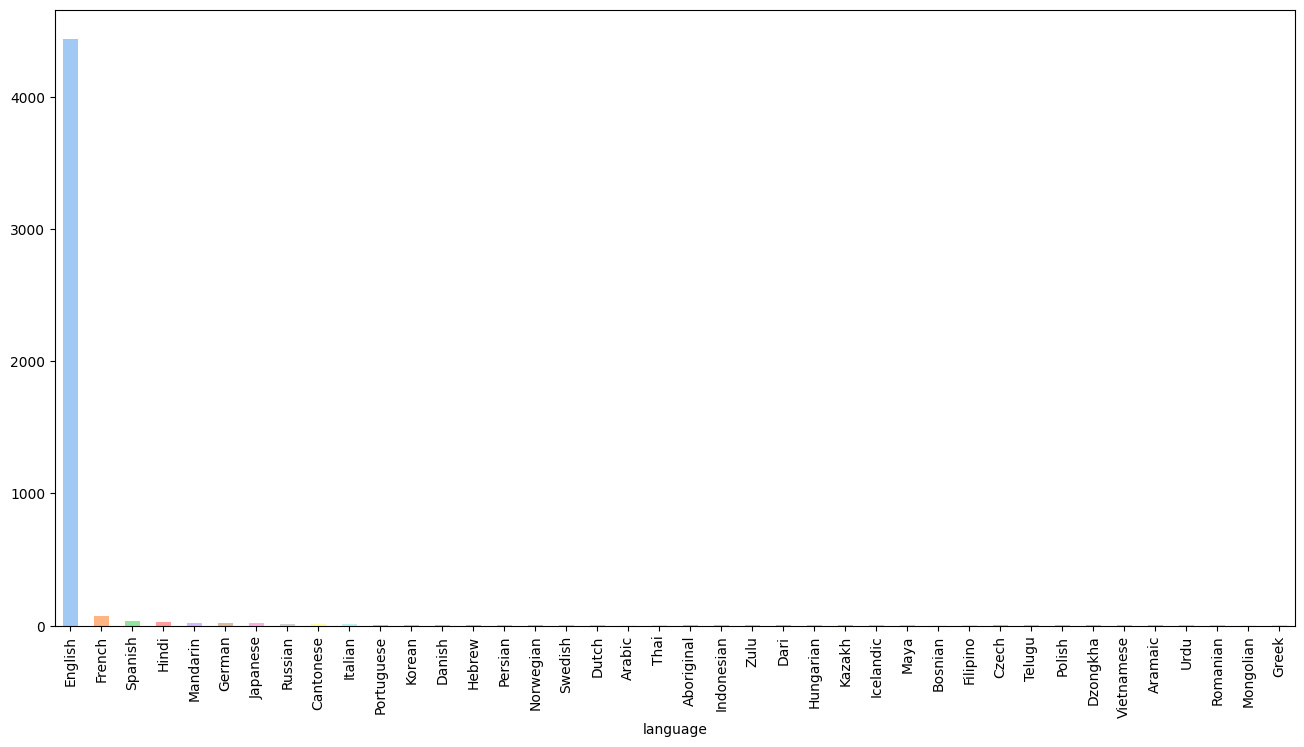

country
USA               3597
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               28
China               23
Japan               21
Italy               20
Hong Kong           15
New Zealand         15
South Korea         12
Denmark             11
Ireland             11
Mexico              11
Russia              11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Thailand             5
Netherlands          5
Iran                 4
Argentina            4
Israel               3
Belgium              3
Czech Republic       3
Switzerland          3
West Germany         3
Iceland              2
Taiwan               2
Greece               2
Poland               2
Hungary              2
Romania              2
Nigeria              1
Colombia             1
Afghanistan          1
Bahamas              1
Finland              1
Pakistan             1
Ind

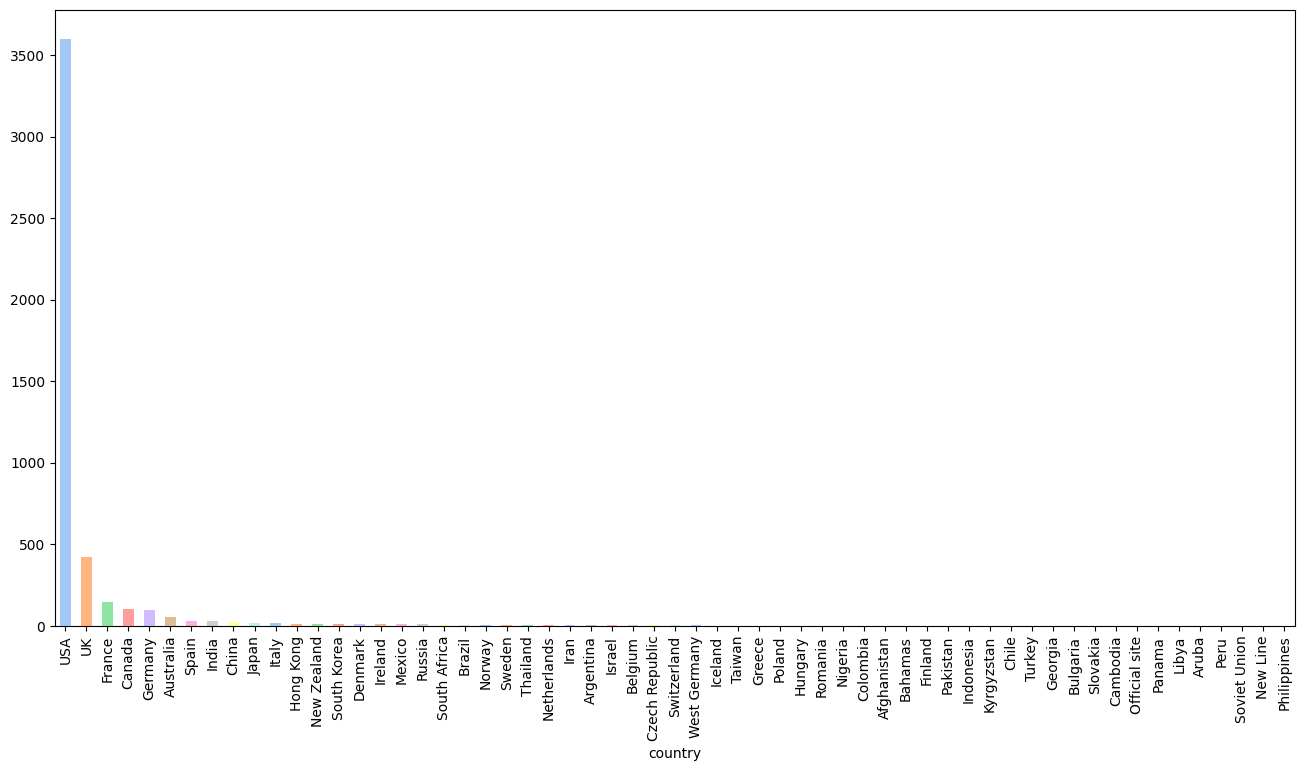

content_rating
R            2062
PG-13        1425
PG            683
Approved      237
G             110
Not Rated     103
Unrated        59
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           2
Name: count, dtype: int64


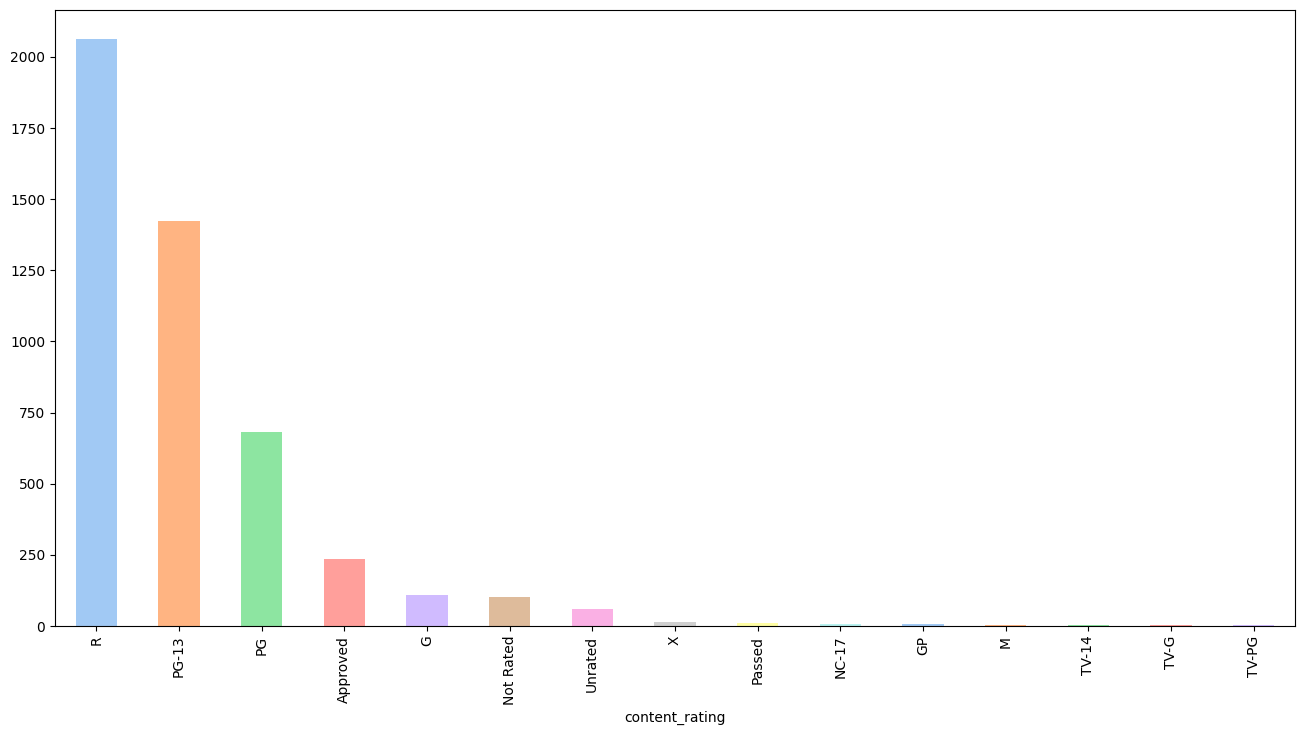

In [409]:
for i in cat_col:
     plot_cat(i)

# Pie Chart

In [410]:
def pie(column_name):
    category_counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.title(f'{column_name.capitalize()} Distribution')
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    plt.show()
    
   

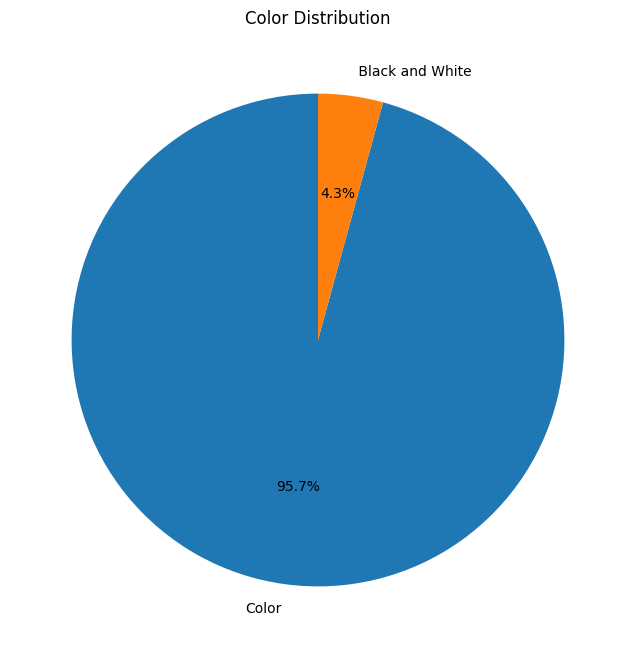

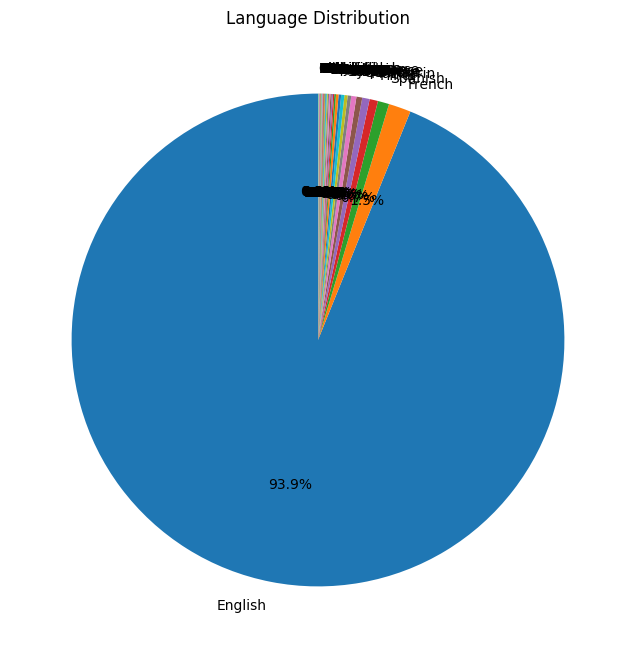

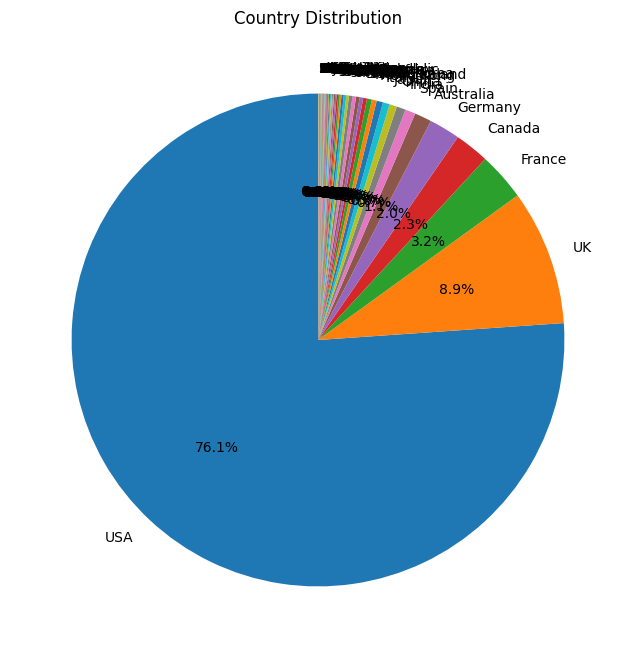

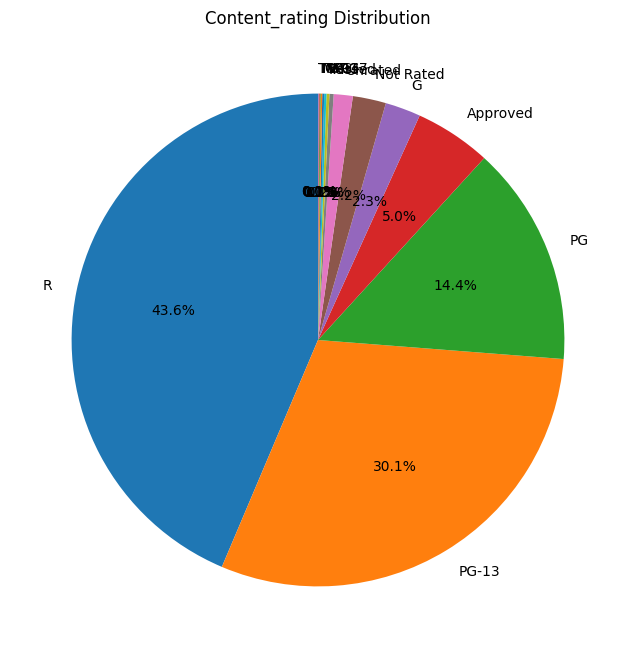

In [411]:
for i in cat_col:
    pie(i)

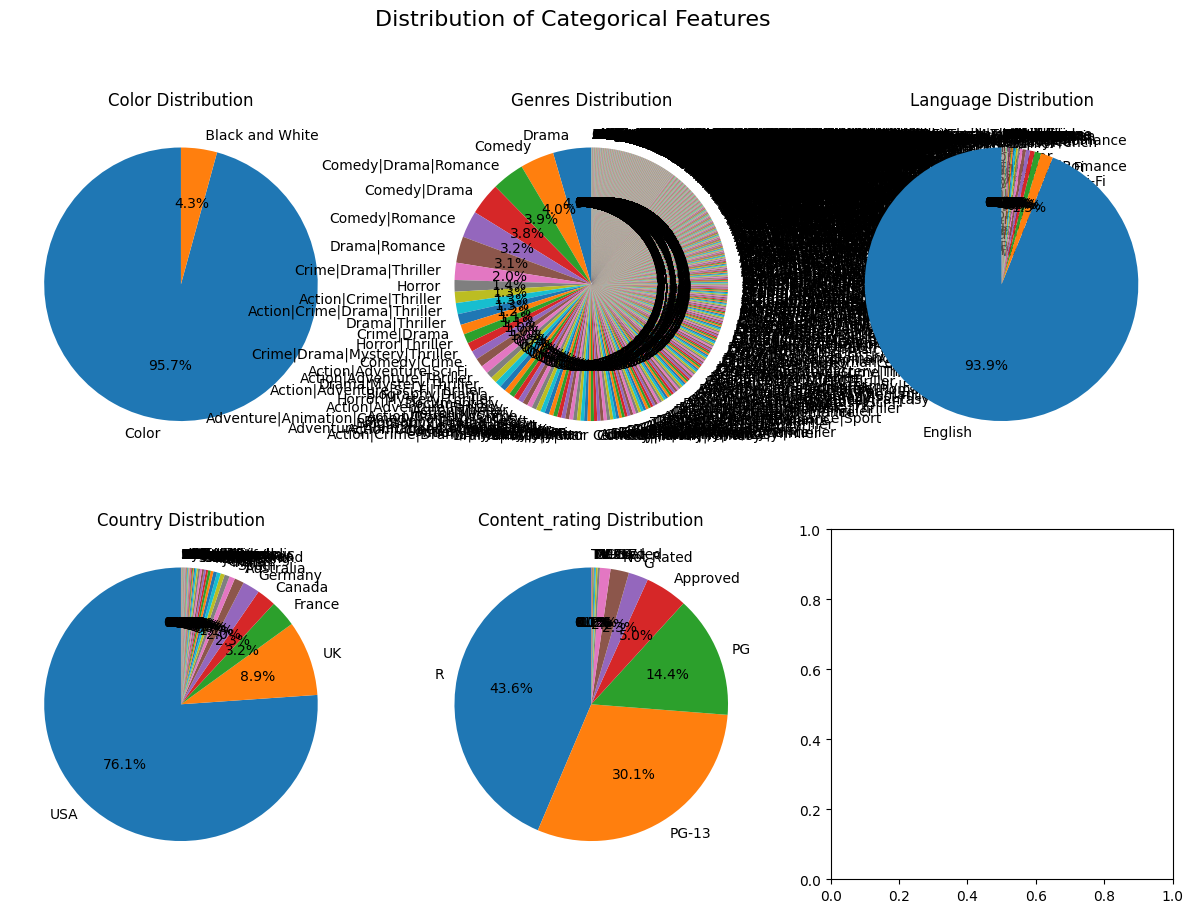

In [412]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Create pie charts for each categorical feature
categorical_features = ['color', 'genres', 'language', 'country', 'content_rating']

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)
    
    # Count the occurrences of each category
    category_counts = df[feature].value_counts()
    
    # Plot pie chart
    axes[row, col].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'{feature.capitalize()} Distribution')

plt.show()

# BIVARIATE ANALYSIS

# Cross-tabulations

In [413]:
# Selecting categorical features for cross-tabulations
categorical_features = ['color', 'genres', 'language', 'country', 'content_rating']

# Create cross-tabulations for each pair of categorical features
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            cross_tab = pd.crosstab(df[feature1], df[feature2])
            print(f'\nCross-tabulation between {feature1} and {feature2}:\n')
            print(cross_tab)


Cross-tabulation between color and genres:

genres            Action  Action|Adventure  \
color                                        
 Black and White       1                 0   
Color                  8                 9   

genres            Action|Adventure|Animation|Comedy|Crime|Family|Fantasy  \
color                                                                      
 Black and White                                                  0        
Color                                                             1        

genres            Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi  \
color                                                                     
 Black and White                                                  0       
Color                                                             2       

genres            Action|Adventure|Animation|Comedy|Family  \
color                                                        
 Black and White                        

# Stacked Bar Charts

In [414]:
categorical_features = ['color', 'content_rating', 'language', 'country']

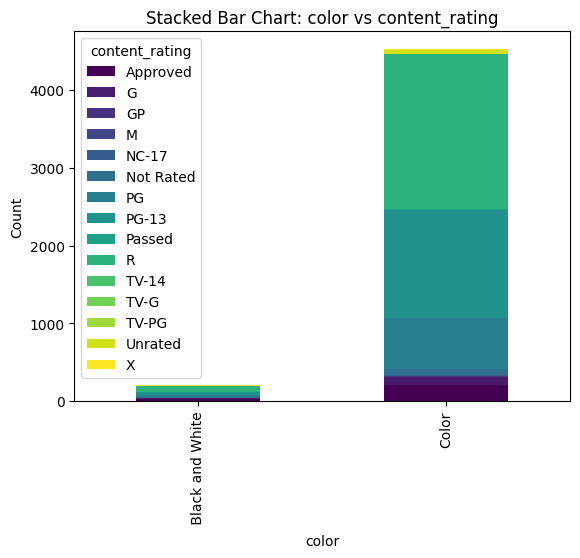

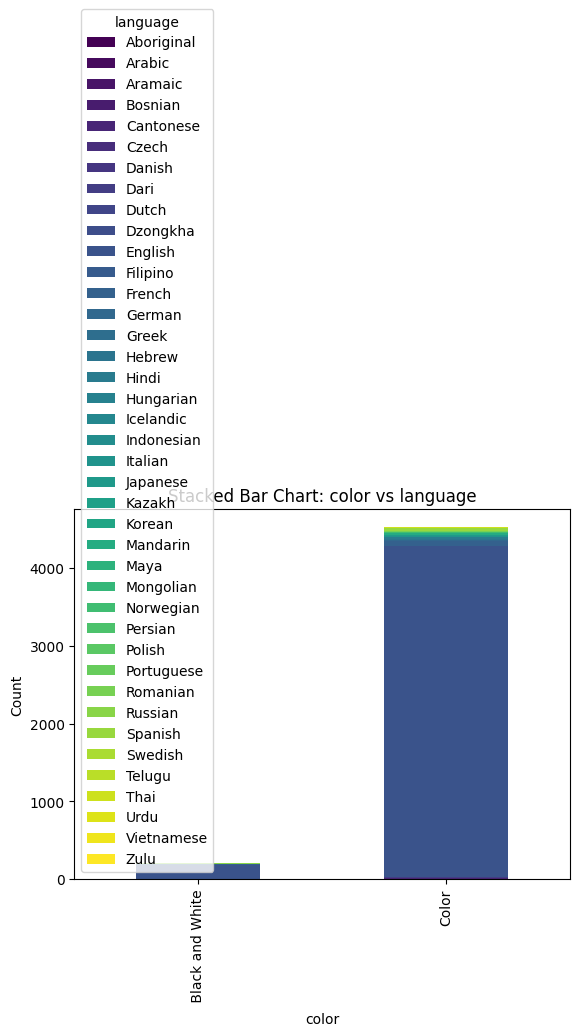

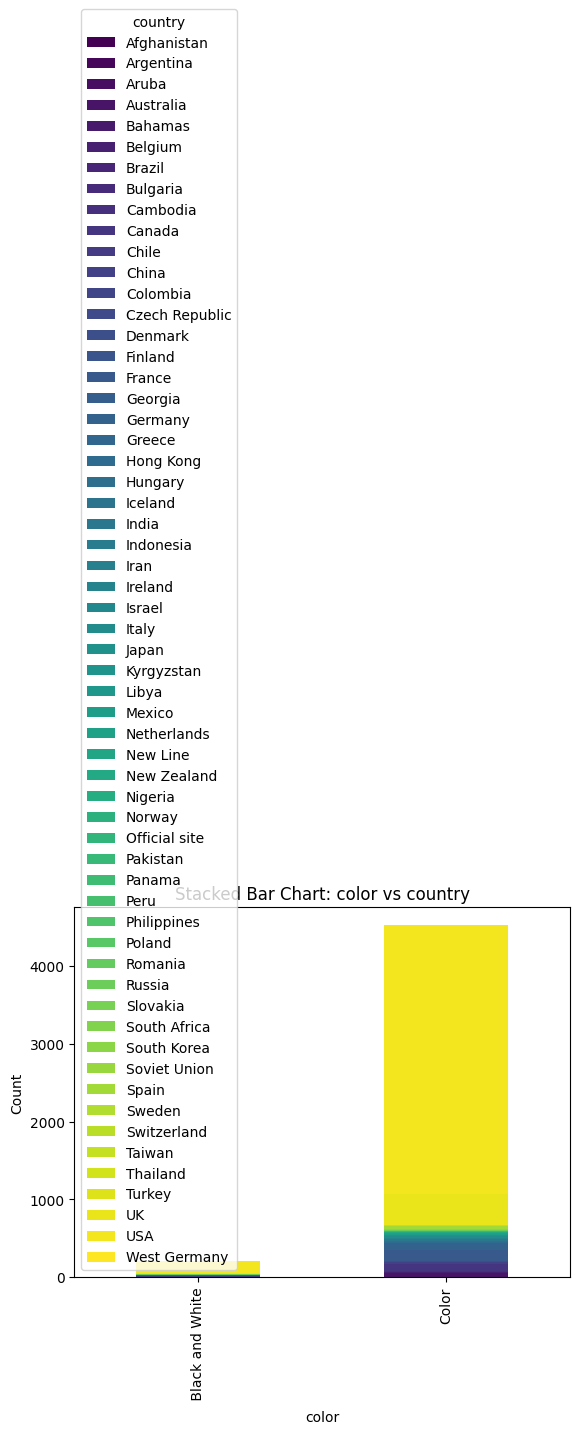

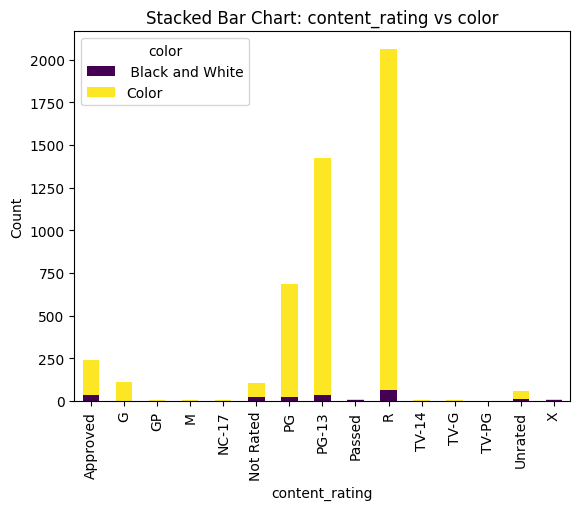

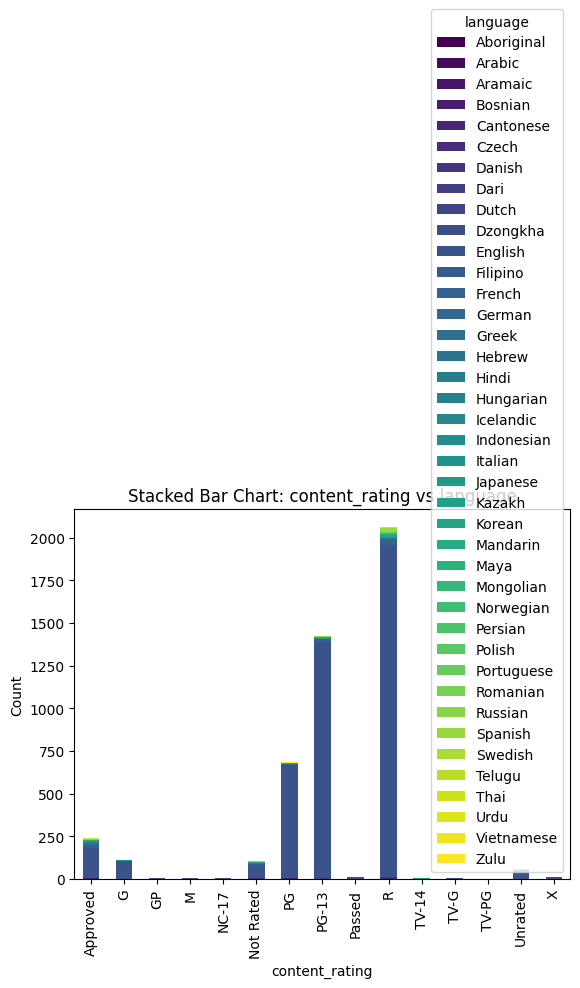

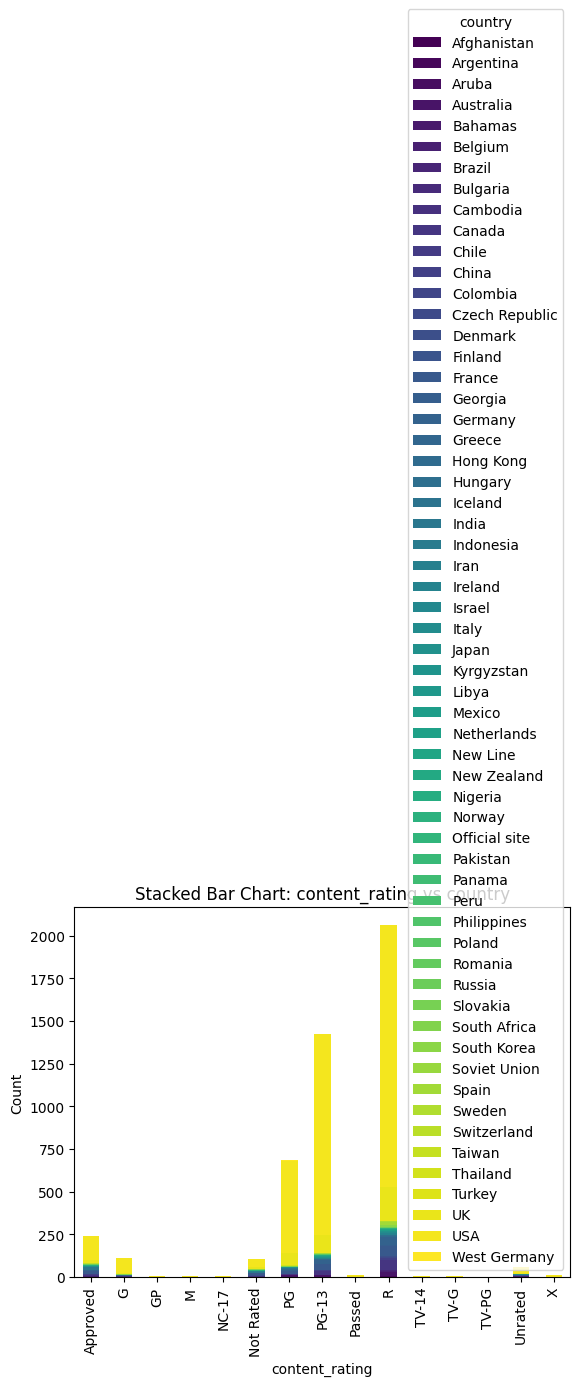

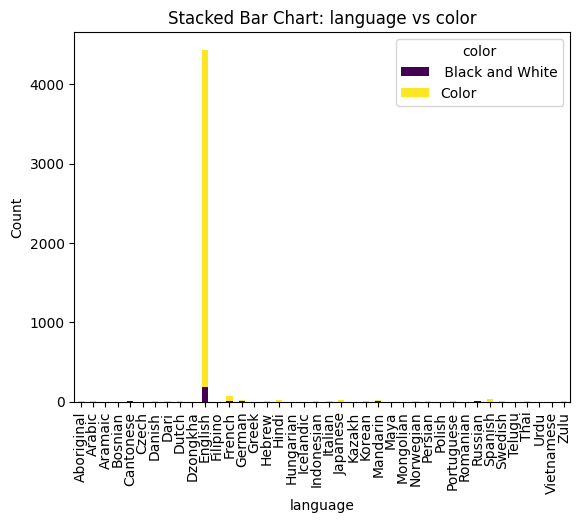

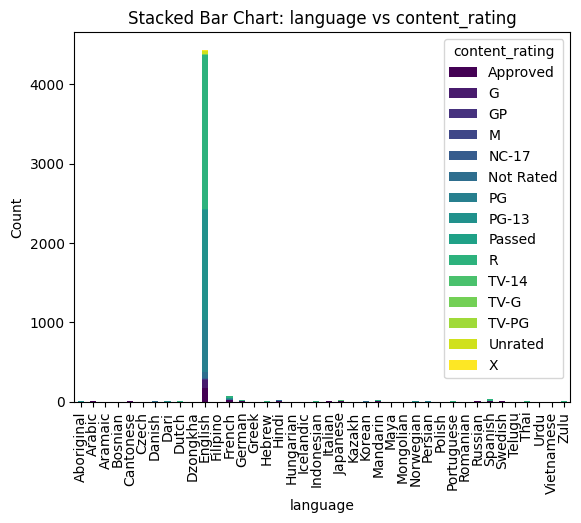

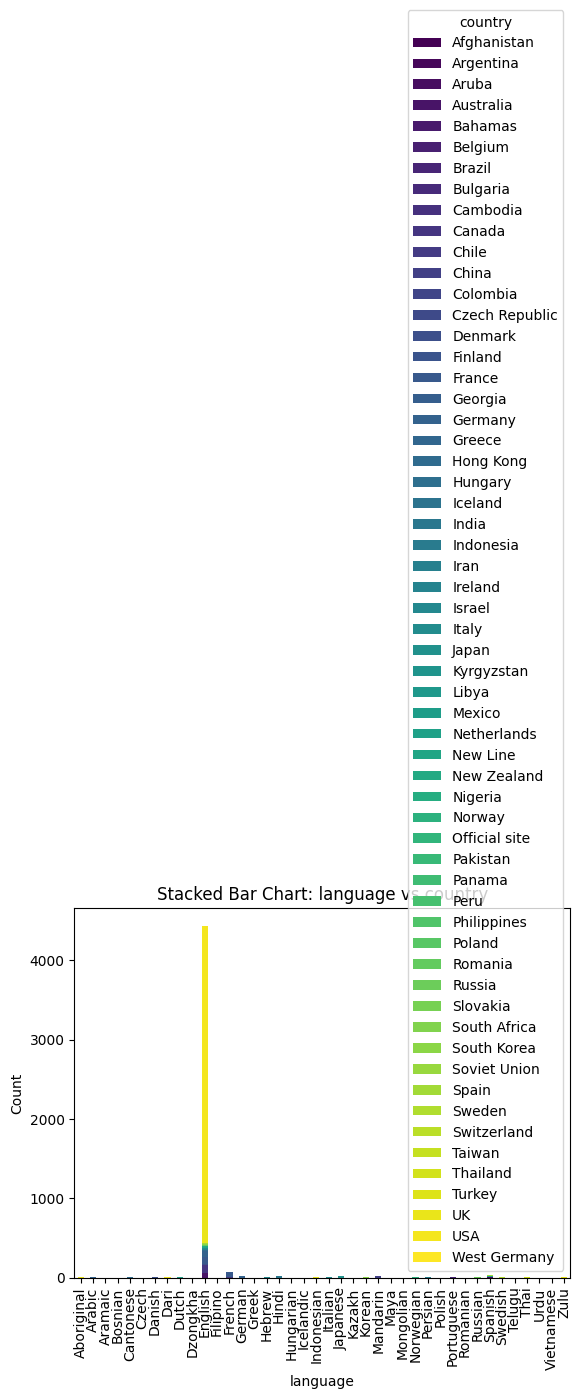

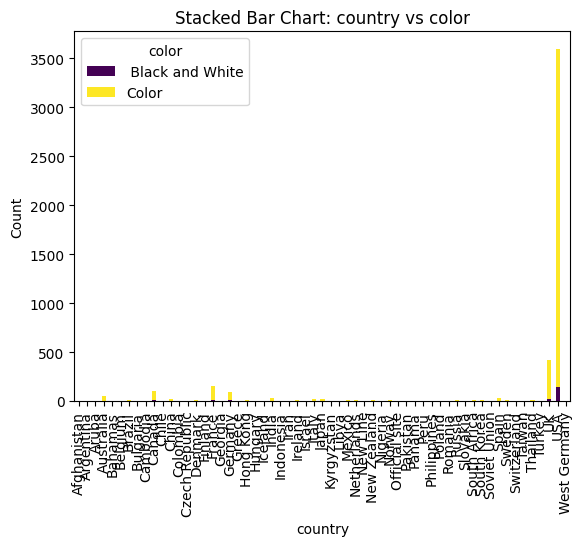

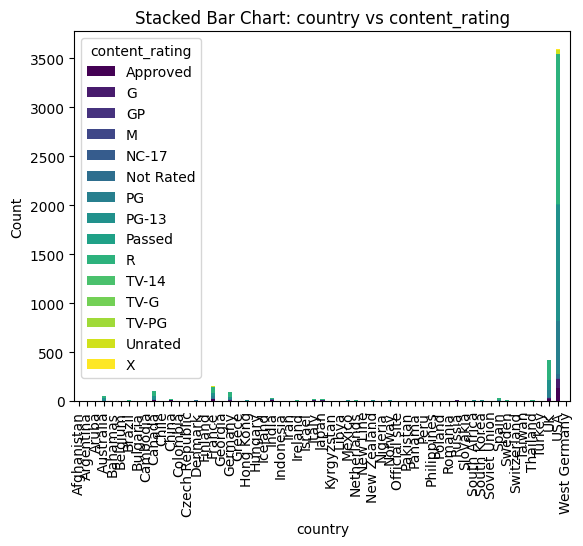

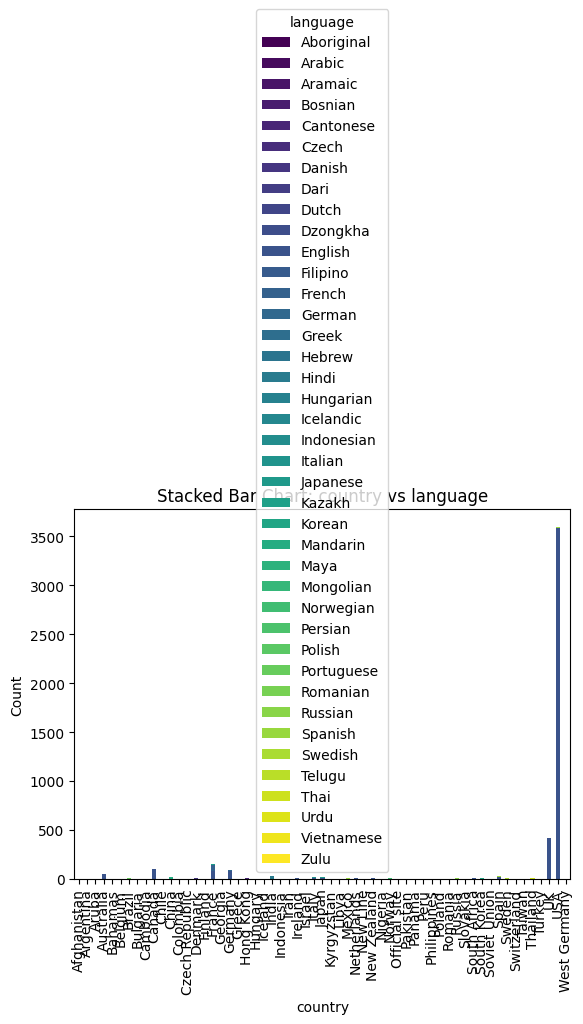

In [415]:


# Create a stacked bar chart for each pair of categorical features
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            # Create a cross-tabulation for the pair of categorical features
            cross_tab = pd.crosstab(df[feature1], df[feature2])
            
            # Plot a stacked bar chart
            cross_tab.plot(kind='bar', stacked=True, colormap='viridis',figsize=(20, 10))
            
            plt.title(f'Stacked Bar Chart: {feature1} vs {feature2}')
            plt.xlabel(feature1)
            plt.ylabel('Count')
            plt.legend(title=feature2)
            
            plt.show()

# Numeric Features

In [416]:
ob= df.dtypes == 'float'
ob

color                        False
director_name                False
num_critic_for_reviews       False
duration                      True
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                        True
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

# Univariate Analysis

# Histograms

In [417]:
numeric_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                     'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
                     'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
                     'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
                     'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


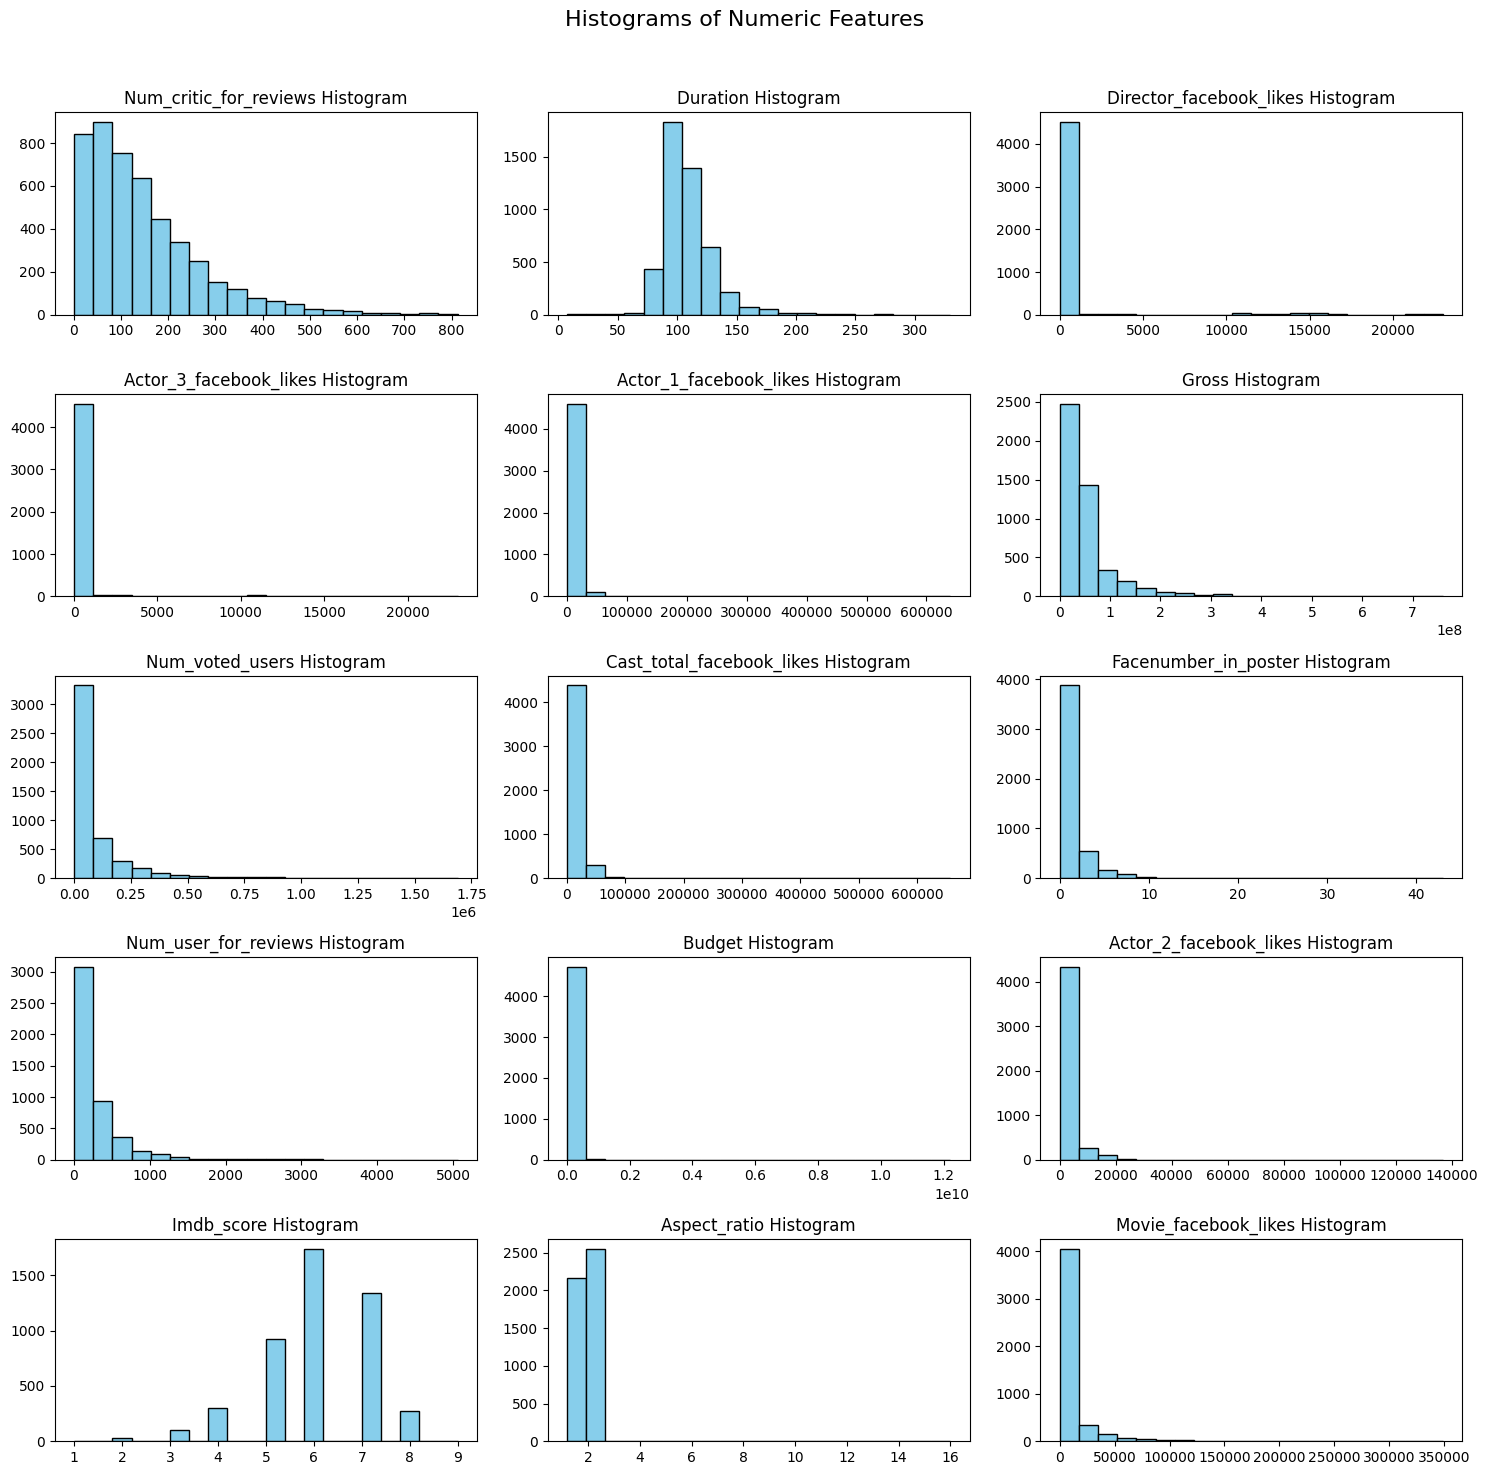

In [418]:
# Set up subplots for each histogram
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('Histograms of Numeric Features', fontsize=16)

# Create histograms for each numeric feature
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    
    # Plot histogram
    axes[row, col].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'{feature.capitalize()} Histogram')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plot

In [419]:
numeric_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                     'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
                     'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
                     'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
                     'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

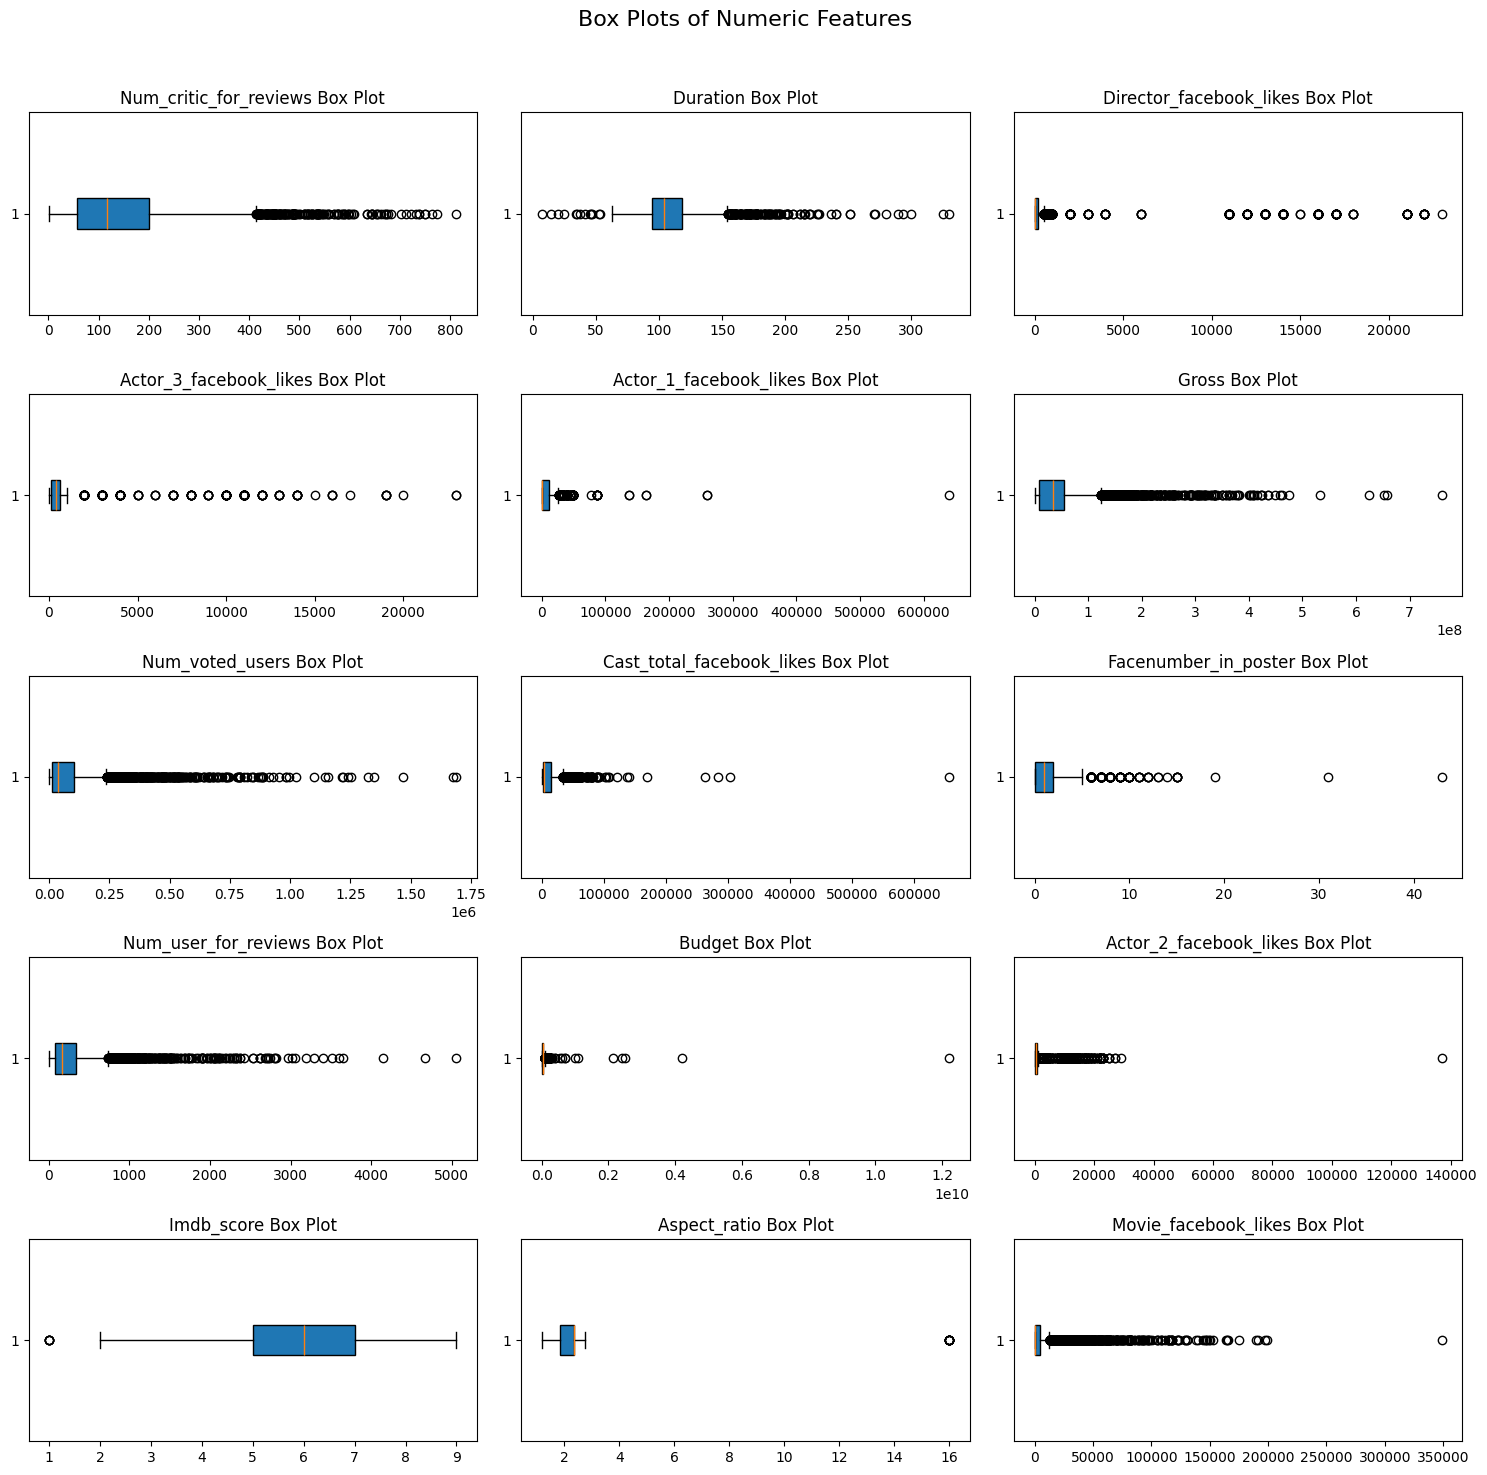

In [420]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('Box Plots of Numeric Features', fontsize=16)

# Create box plots for each numeric feature
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    
    # Plot box plot
    axes[row, col].boxplot(df[feature], vert=False, patch_artist=True)
    axes[row, col].set_title(f'{feature.capitalize()} Box Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Kernel Density Plots 


In [421]:
numeric_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                     'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
                     'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
                     'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
                     'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

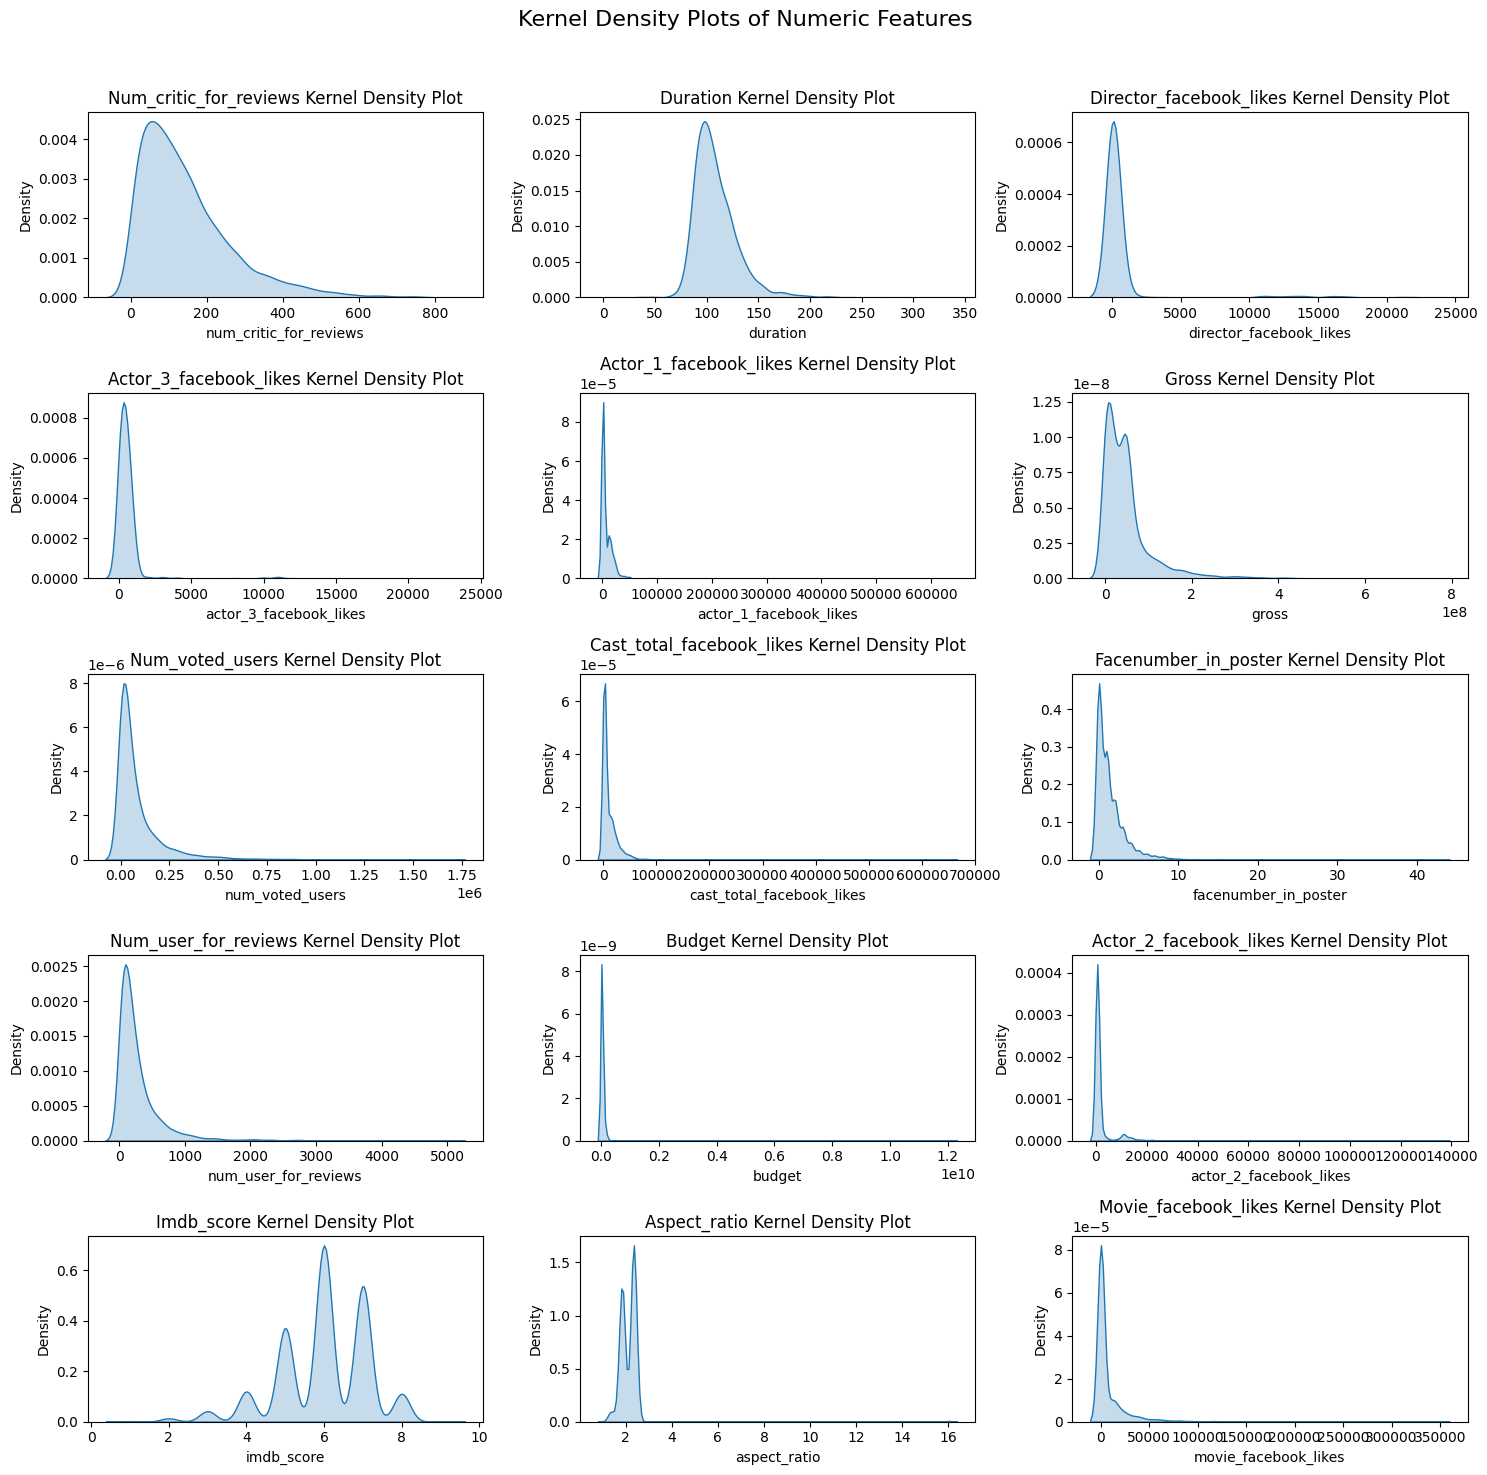

In [422]:
# Set up subplots for each kernel density plot
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
fig.suptitle('Kernel Density Plots of Numeric Features', fontsize=16)

# Create kernel density plots for each numeric feature
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 3)
    
    # Plot kernel density plot
    sns.kdeplot(data=df, x=feature, ax=axes[row, col], fill=True, common_norm=False)
    axes[row, col].set_title(f'{feature.capitalize()} Kernel Density Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Bi Variate Analysis

# Scatter Plots

In [423]:
numeric_features_pairs = [('num_critic_for_reviews', 'imdb_score'),
                          ('duration','imdb_score' ),
                          ('budget', 'imdb_score'),
                          ('gross', 'imdb_score'),
                          ('num_voted_users', 'imdb_score'),
                          ('num_user_for_reviews', 'imdb_score'),
                          ]

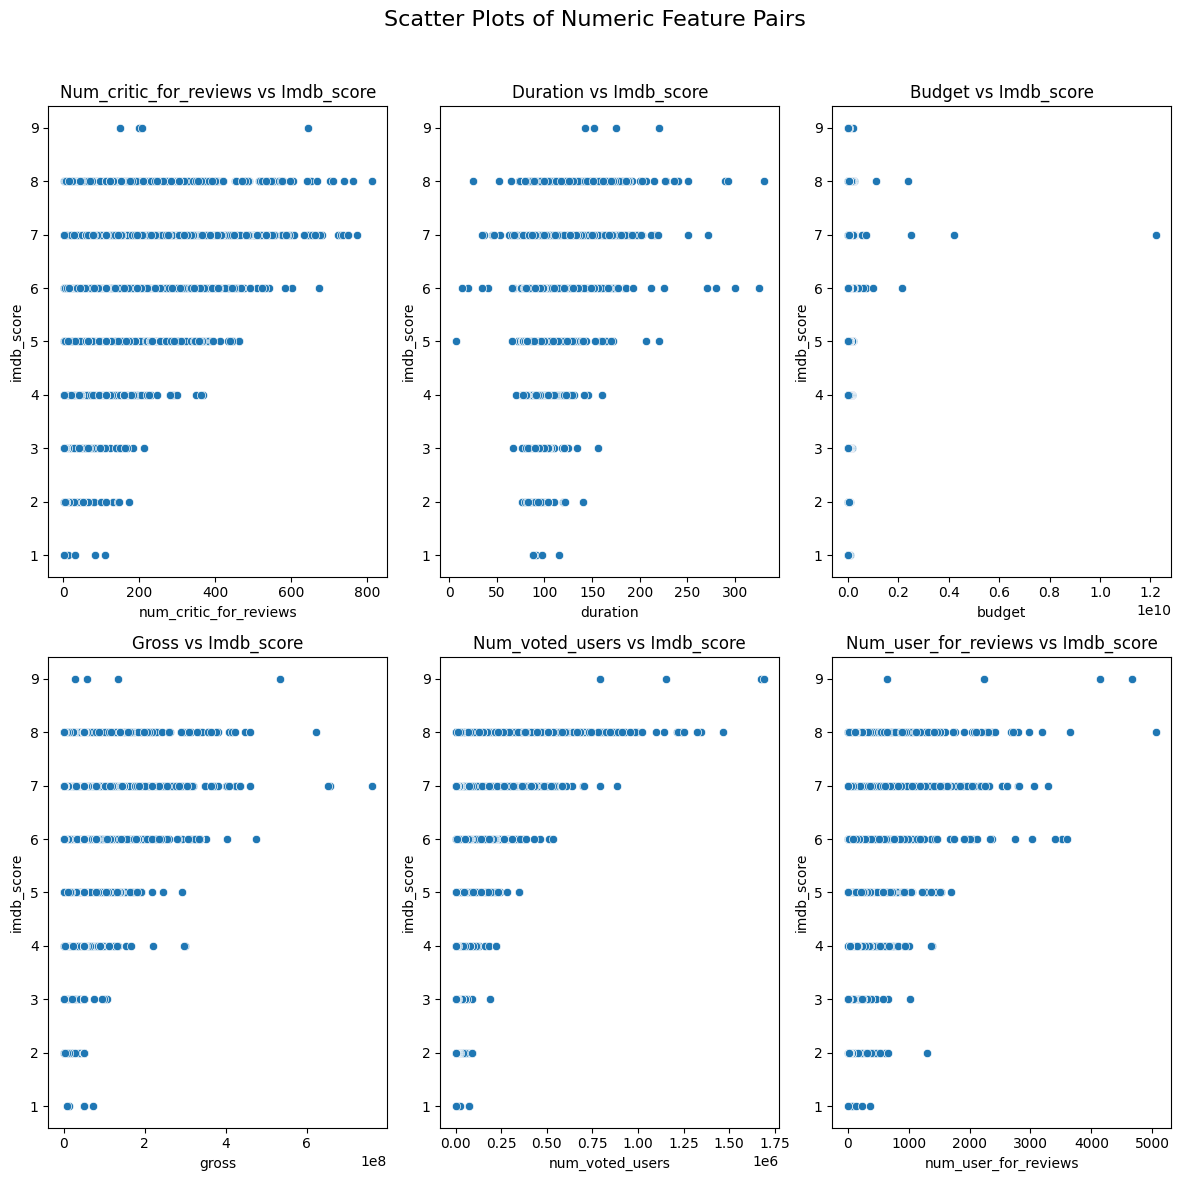

In [424]:
# Set up subplots for each scatter plot
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
fig.suptitle('Scatter Plots of Numeric Feature Pairs', fontsize=16)

# Create scatter plots for each pair of numeric features
for i, (feature_x, feature_y) in enumerate(numeric_features_pairs):
    row, col = divmod(i, 3)
    
    # Plot scatter plot
    sns.scatterplot(data=df, x=feature_x, y=feature_y, ax=axes[row, col])
    axes[row, col].set_title(f'{feature_x.capitalize()} vs {feature_y.capitalize()}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Pair Plots

In [425]:
# Selecting numeric features for pair plot
numeric_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                     'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
                     'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
                     'num_user_for_reviews', 'budget', 'actor_2_facebook_likes',
                     'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


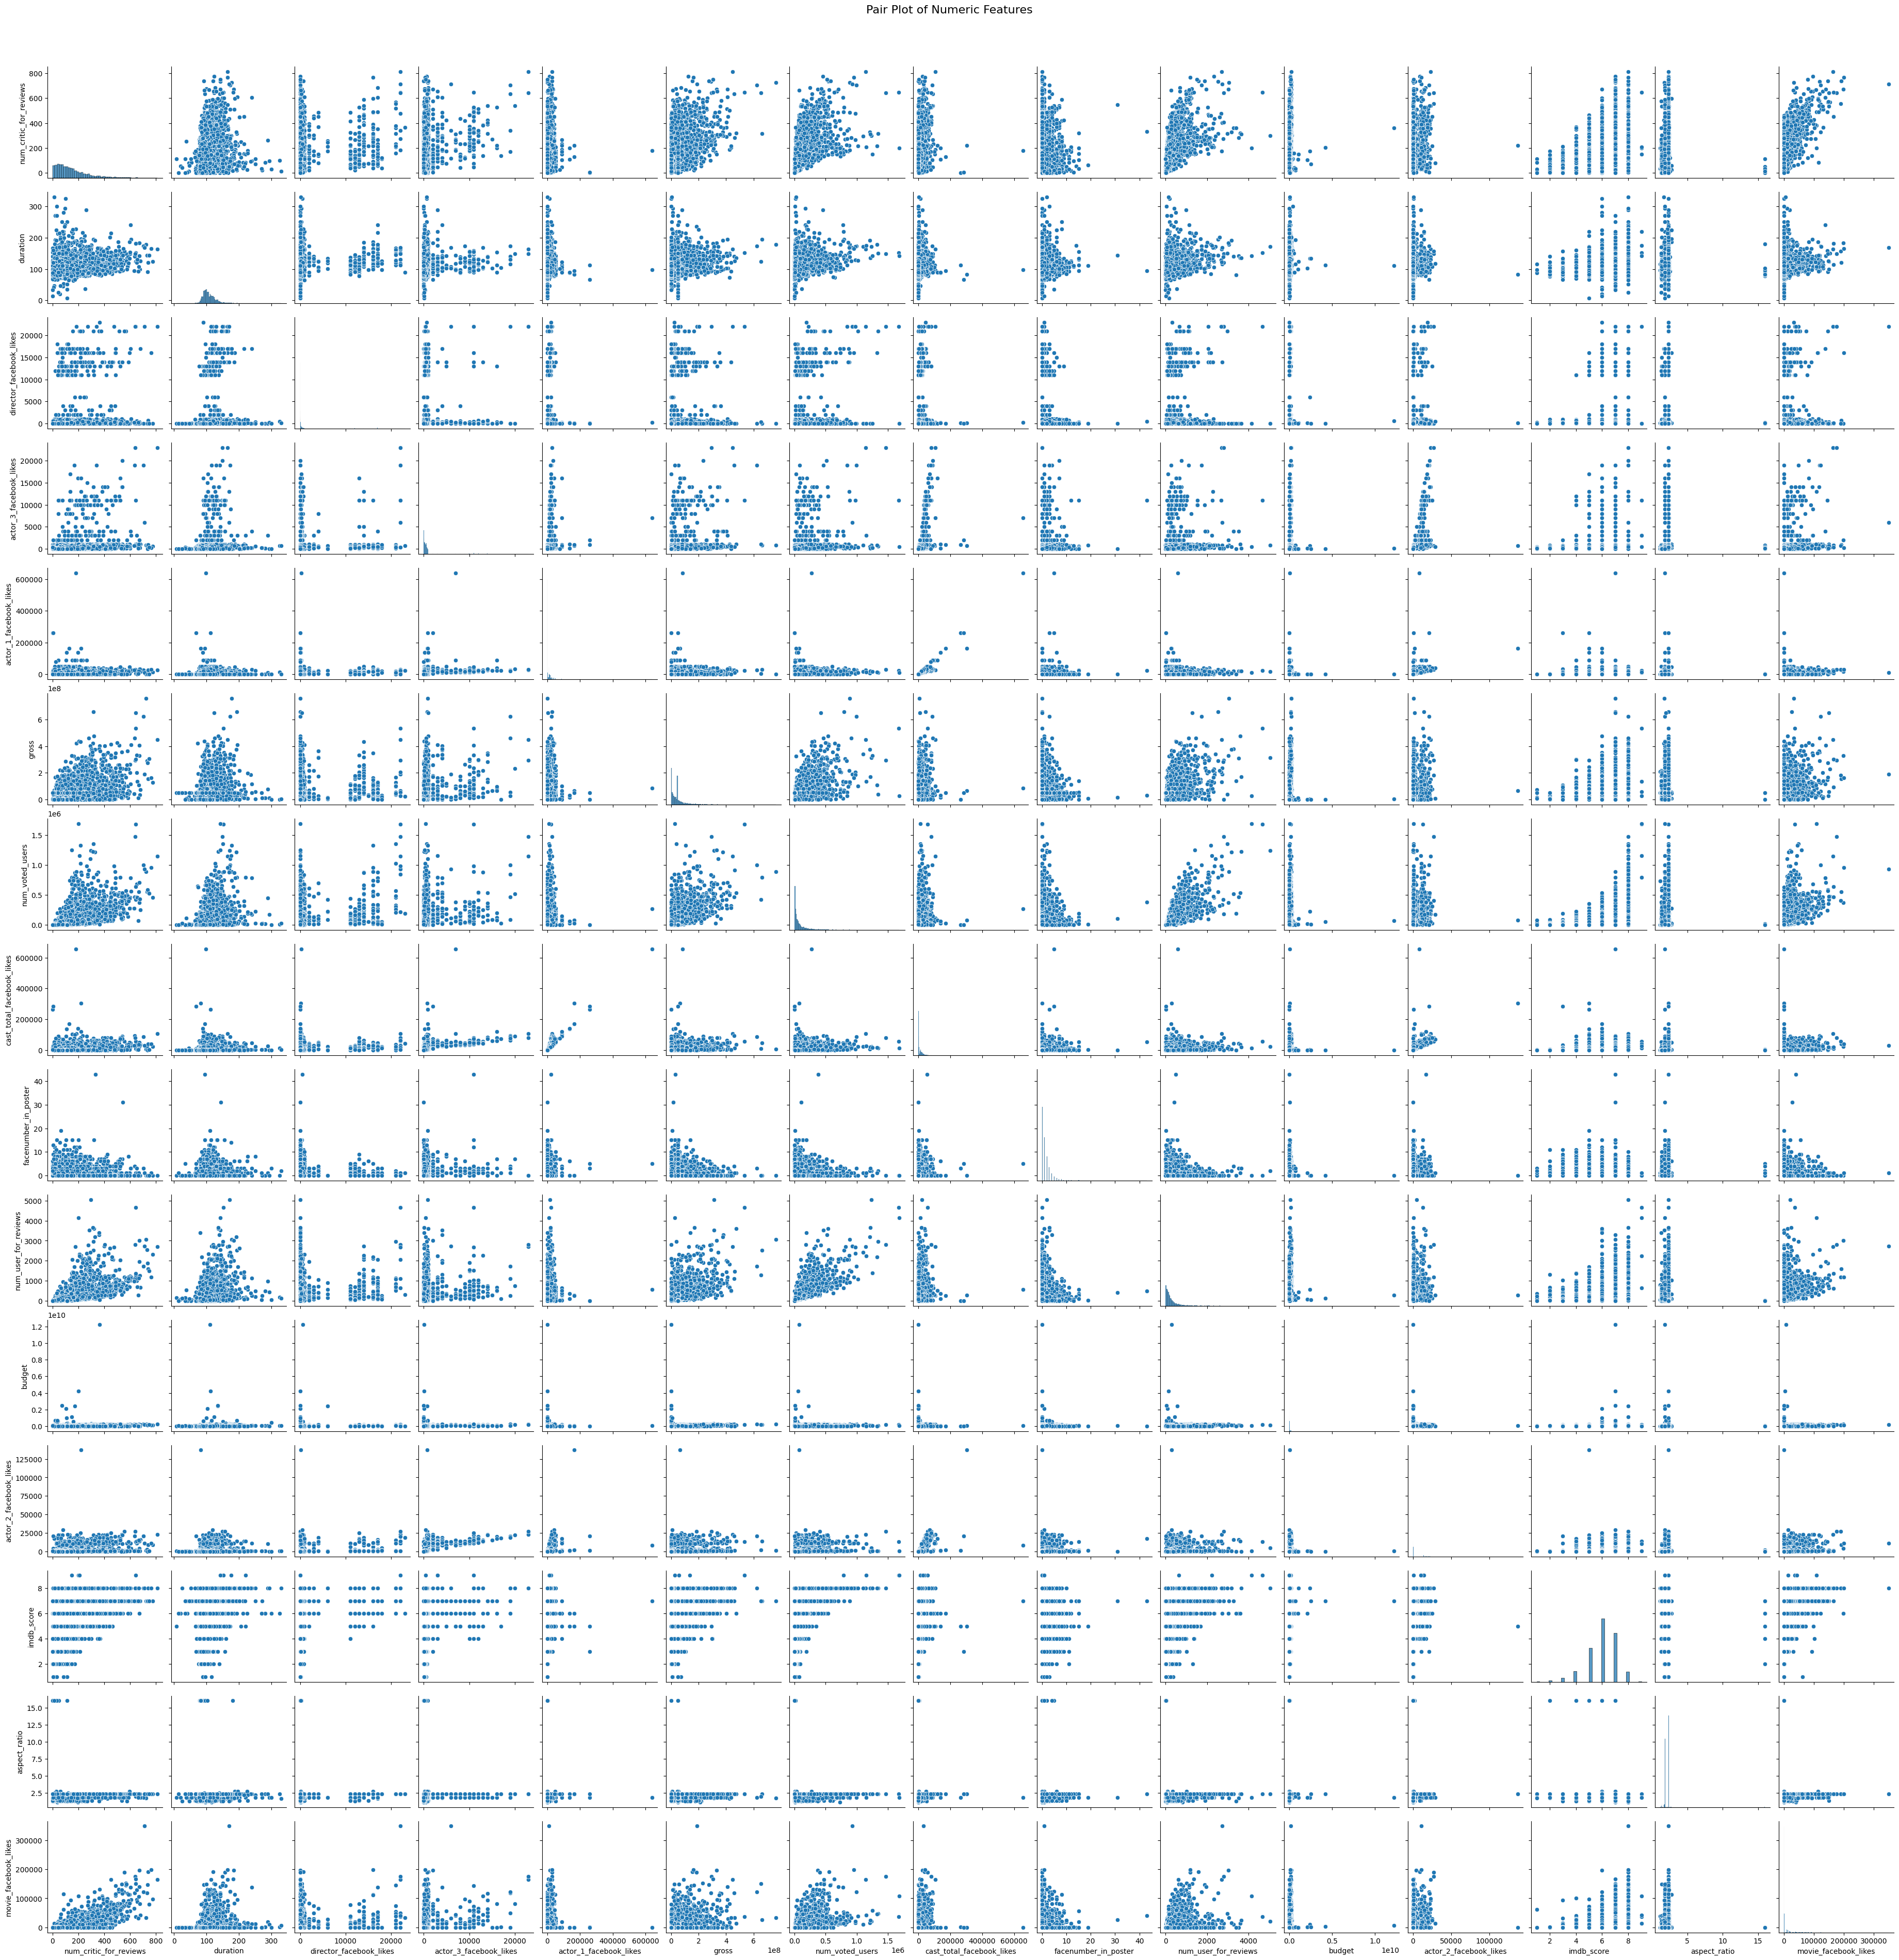

In [426]:
# Create a pair plot
sns.pairplot(df[numeric_features])
plt.suptitle('Pair Plot of Numeric Features', y=1.02, fontsize=16)
plt.show()

# Box Plots or Violin Plots:

In [427]:
lis=['director_name','language','genres']
num=['imdb_score']

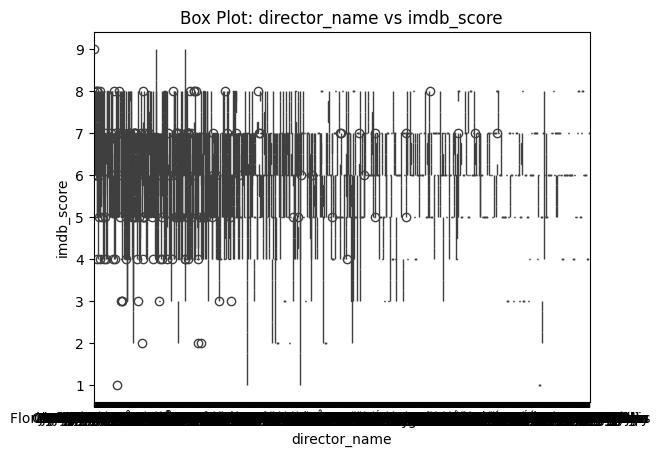

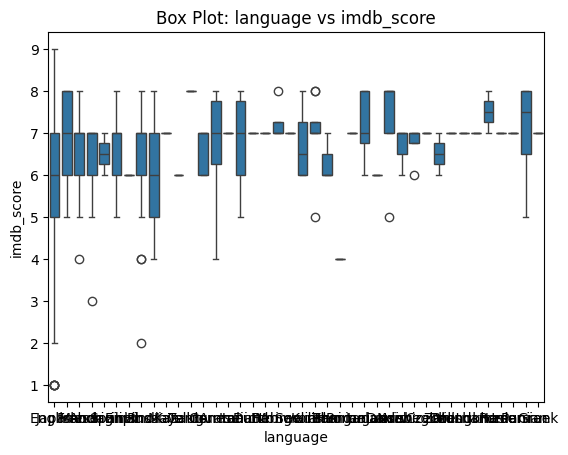

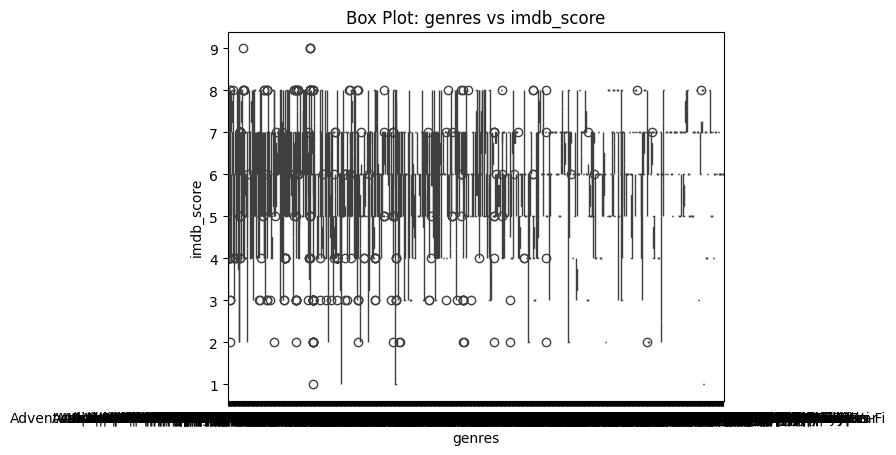

In [428]:
for i in lis:
    for j in num:
        # Create a box plot
        sns.boxplot(x=i, y=j, data=df)
        plt.title(f'Box Plot: {i} vs {j}')
        plt.show()

# Bar Plots or Count Plots:

In [429]:
lis=['director_name','language','genres']
num=['imdb_score']

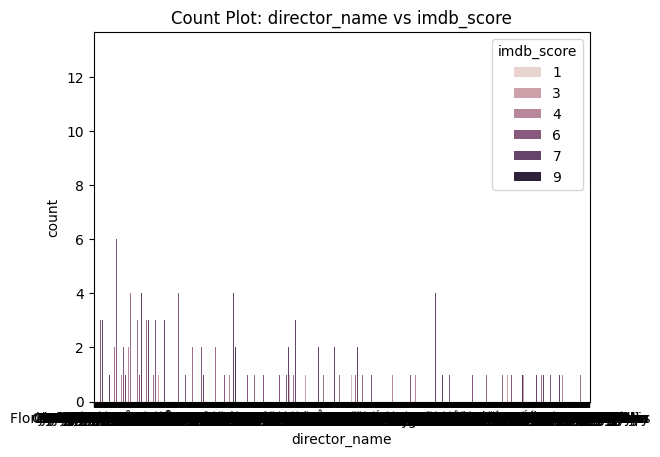

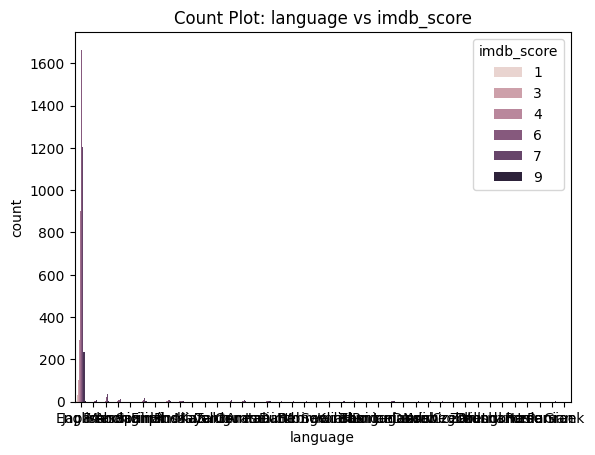

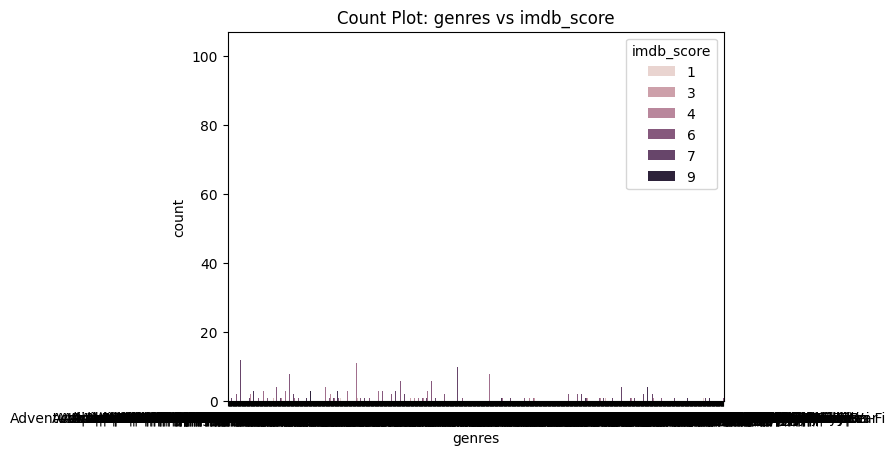

In [430]:
for i in lis:
    for j in num:
        # Create a count plot
        sns.countplot(x=i, hue=j, data=df)
        plt.title(f'Count Plot: {i} vs {j}')
        plt.show()


In [431]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                     723     178.0   
1     Color     Gore Verbinski                     302     169.0   
2     Color         Sam Mendes                     602     148.0   
3     Color  Christopher Nolan                     813     164.0   
5     Color     Andrew Stanton                     462     132.0   
...     ...                ...                     ...       ...   
5035  Color   Robert Rodriguez                      56      81.0   
5036  Color    Anthony Vallone                     112      84.0   
5037  Color       Edward Burns                      14      95.0   
5038  Color        Scott Smith                       1      87.0   
5042  Color           Jon Gunn                      43      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                           0                     855    Joel David Moore   
1                         563                    1000       Orlando Bloom   
2                           0                     161        Rory Kinnear   
3                       22000                   23000      Christian Bale   
5                         475                     530     Samantha Morton   
...                       ...                     ...                 ...   
5035                        0                       6     Peter Marquardt   
5036                        2                       2      John Considine   
5037                        0                     133  Caitlin FitzGerald   
5038                        2                     318       Daphne Zuniga   
5042                       16                      16    Brian Herzlinger   

      actor_1_facebook_likes         gross  \
0                       1000  7.605058e+08   
1                      40000  3.094042e+08   
2                      11000  2.000742e+08   
3                      27000  4.481306e+08   
5                        640  7.305868e+07   
...                      ...           ...   
5035                     121  2.040920e+06   
5036                      45  4.906555e+07   
5037                     296  4.584000e+03   
5038                     637  4.906555e+07   
5042                      86  8.522200e+04   

                                   genres  ... num_user_for_reviews language  \
0         Action|Adventure|Fantasy|Sci-Fi  ...                 3054  English   
1                Action|Adventure|Fantasy  ...                 1238  English   
2               Action|Adventure|Thriller  ...                  994  English   
3                         Action|Thriller  ...                 2701  English   
5                 Action|Adventure|Sci-Fi  ...                  738  English   
...                                   ...  ...                  ...      ...   
5035  Action|Crime|Drama|Romance|Thriller  ...                  130  Spanish   
5036                          Crime|Drama  ...                    1  English   
5037                         Comedy|Drama  ...                   14  English   
5038                         Comedy|Drama  ...                    6  English   
5042                          Documentary  ...                   84  English   

      country  content_rating        budget  title_year  \
0         USA           PG-13  2.370000e+08        2009   
1         USA           PG-13  3.000000e+08        2007   
2          UK           PG-13  2.450000e+08        2015   
3         USA           PG-13  2.500000e+08        2012   
5         USA           PG-13  2.637000e+08        2012   
...       ...             ...           ...         ...   
5035      USA               R  7.000000e+03        1992   
5036      USA           PG-13  3.250000e+03        2005   
5037      USA       Not Rated  9.000000e+03        2011   
5038   Canada        Approved  4.071832e+07        2013   
5042      USA              PG  1.100000e+03        2004   

     actor_2_facebook_likes imdb_score  a

# SPLITTING NUMERICAL AND CATEGORICAL COLUMNS

In [432]:
numeric_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object', 'O','bool']]

In [433]:
numeric_var_names

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [434]:
cat_var_names

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

# Outliers and Skewness:

##  Handling outliers

### Before treating outliers we need to check the distribution of the data.

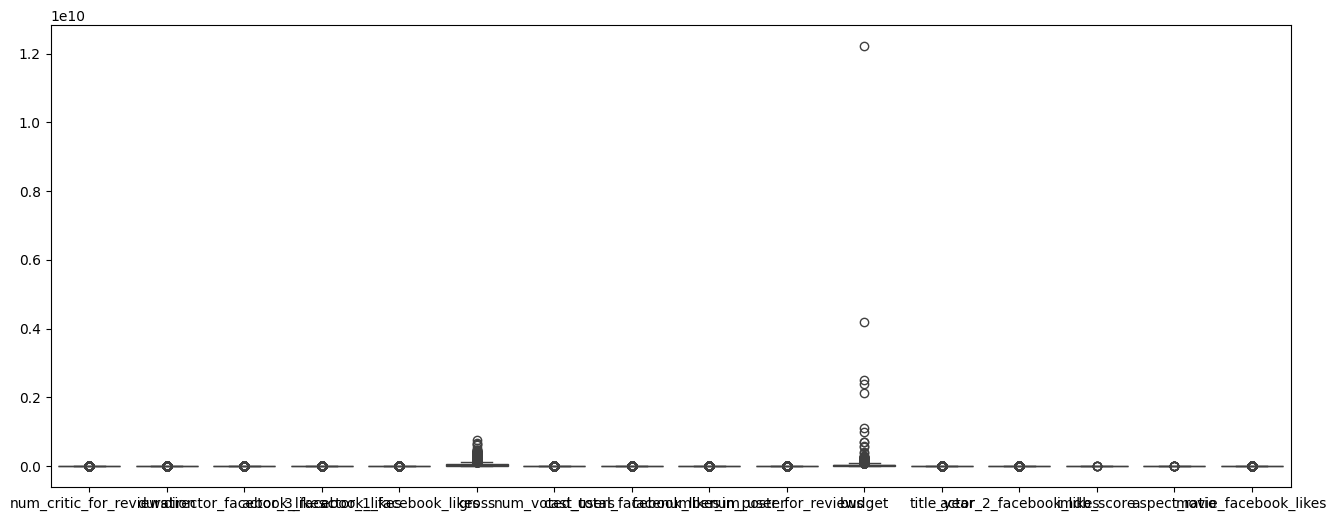

In [435]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df[numeric_var_names])
plt.show()

# Before treating outliers

In [436]:
numeric_var_names = ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

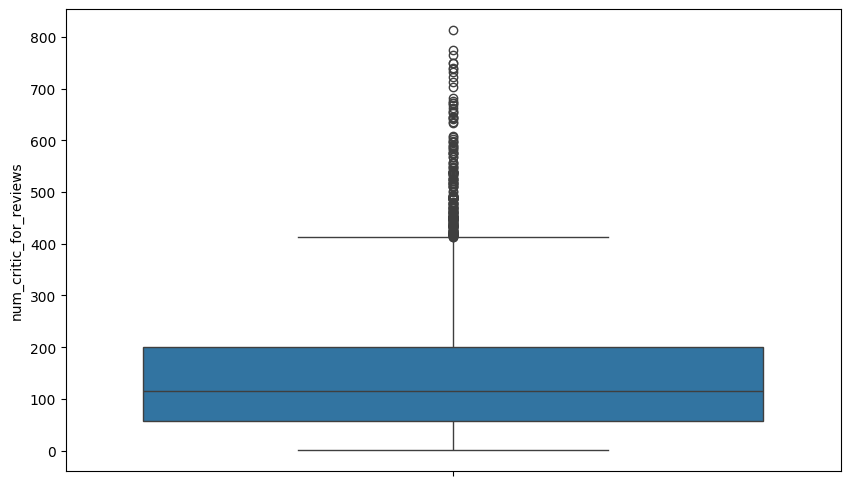

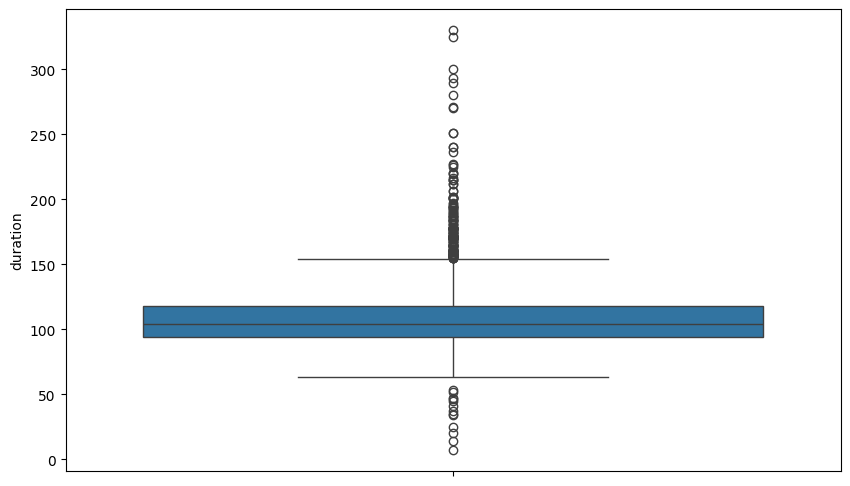

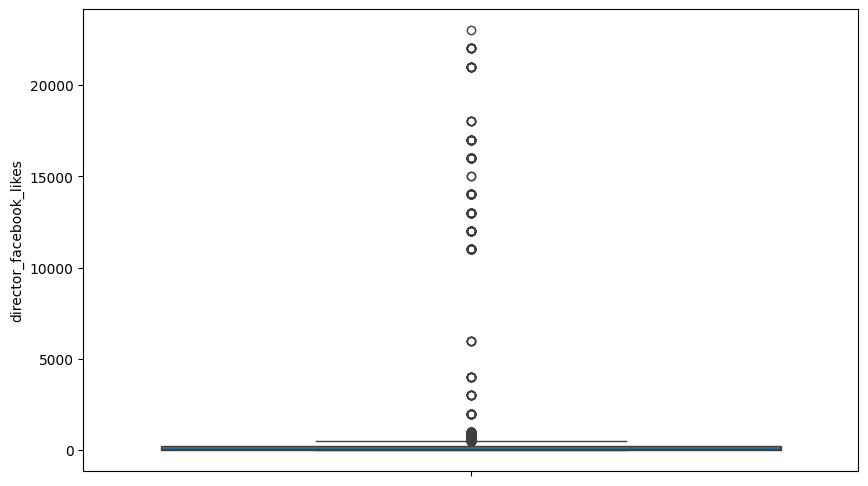

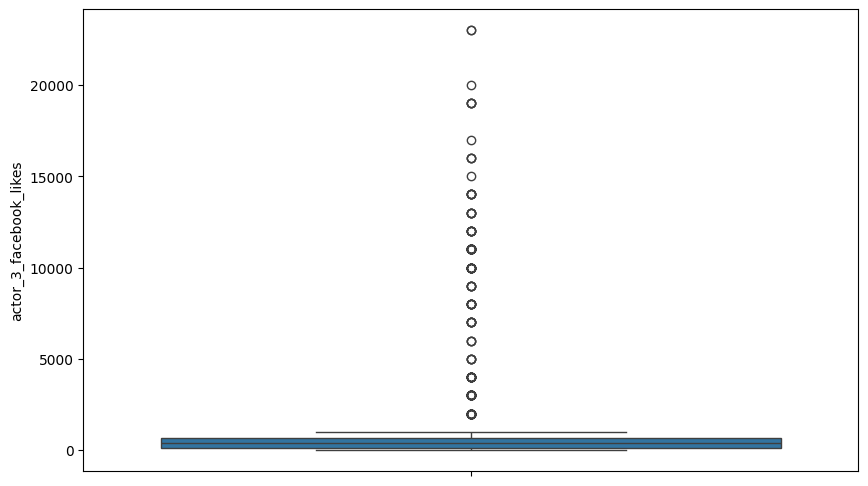

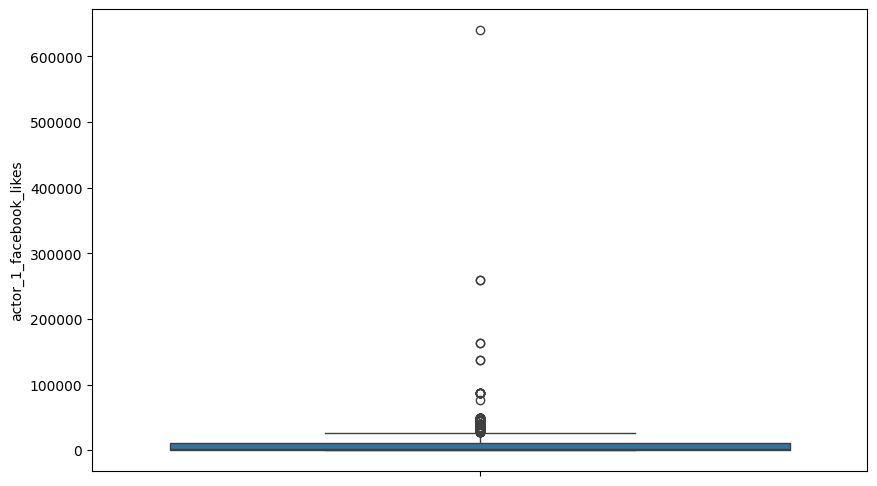

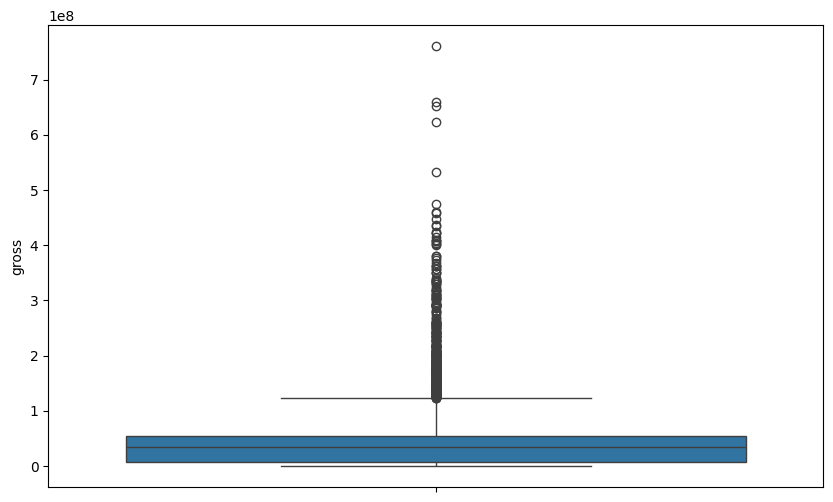

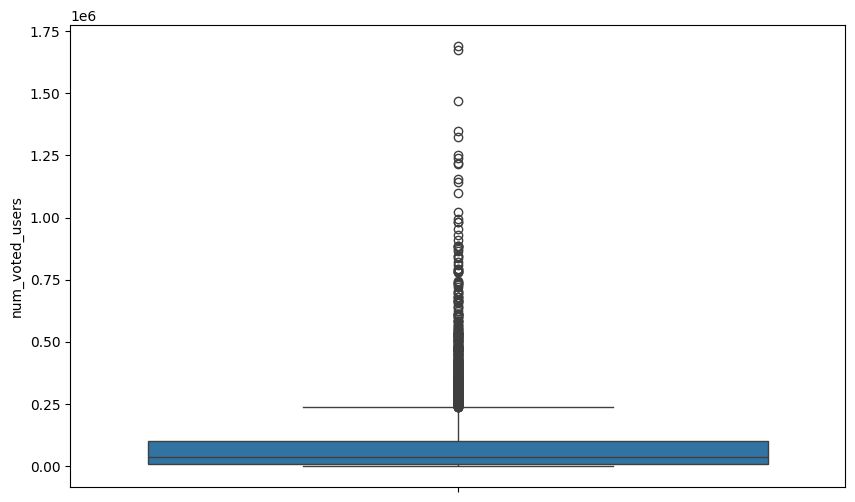

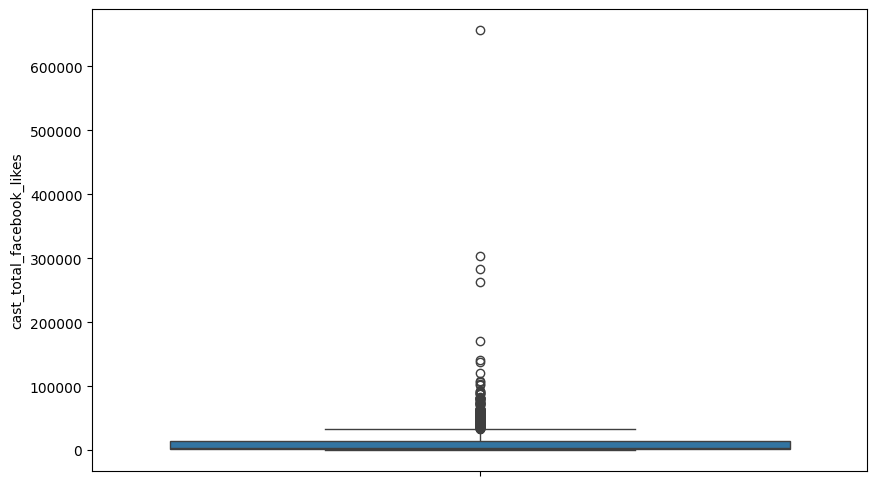

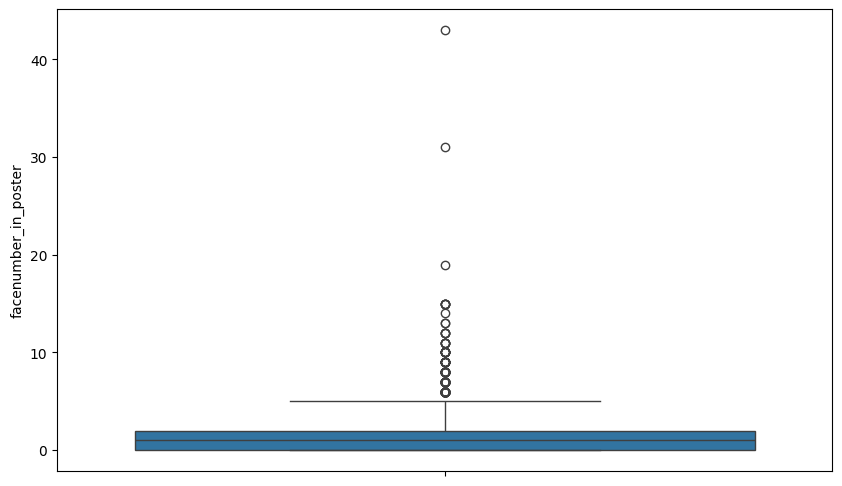

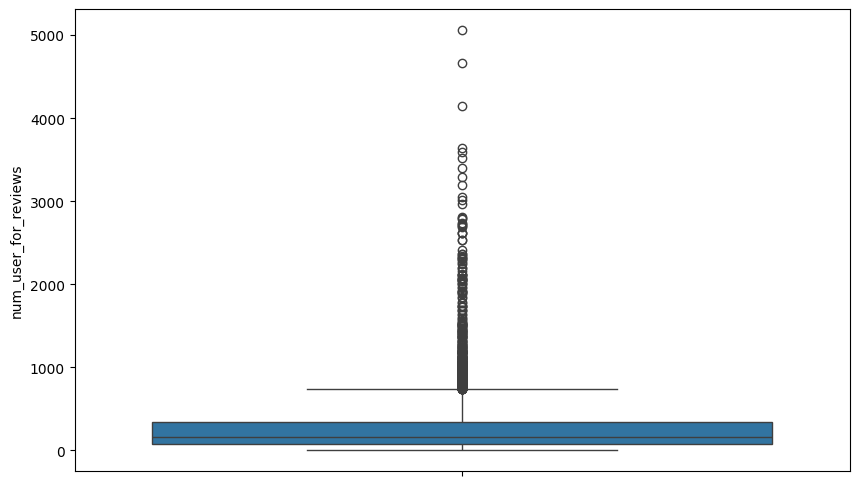

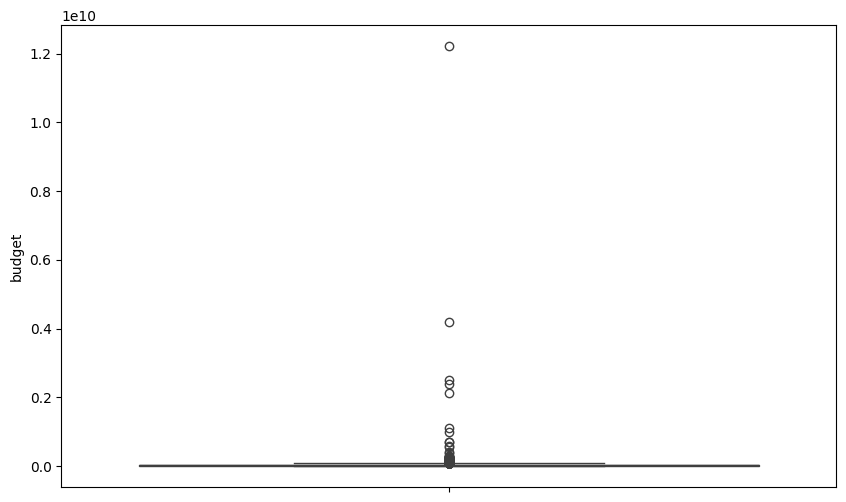

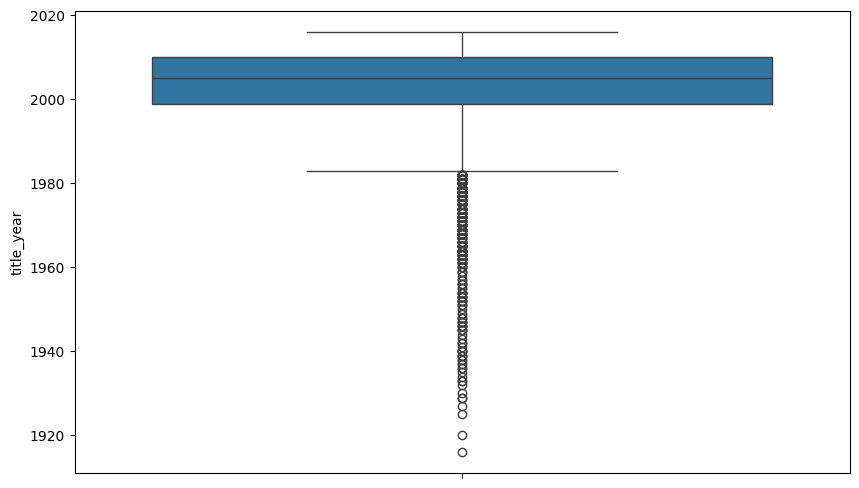

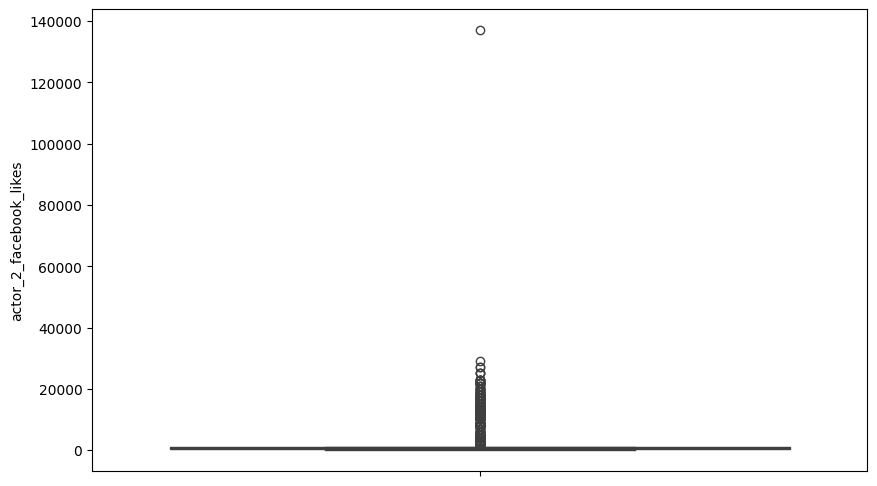

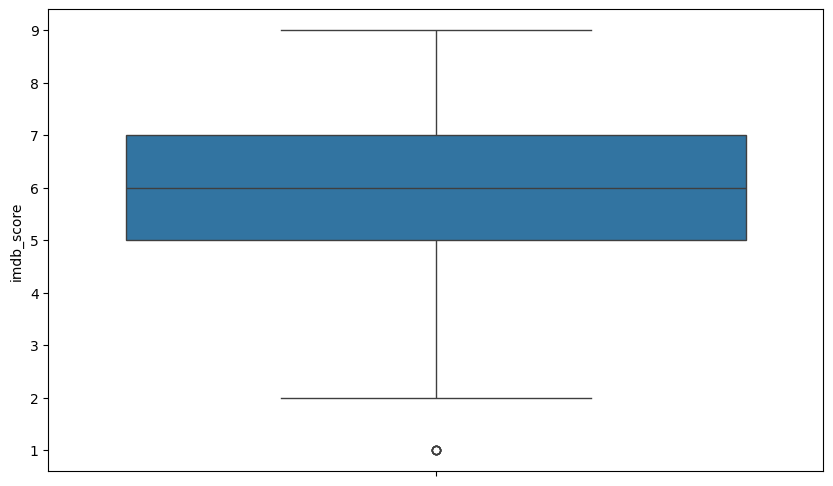

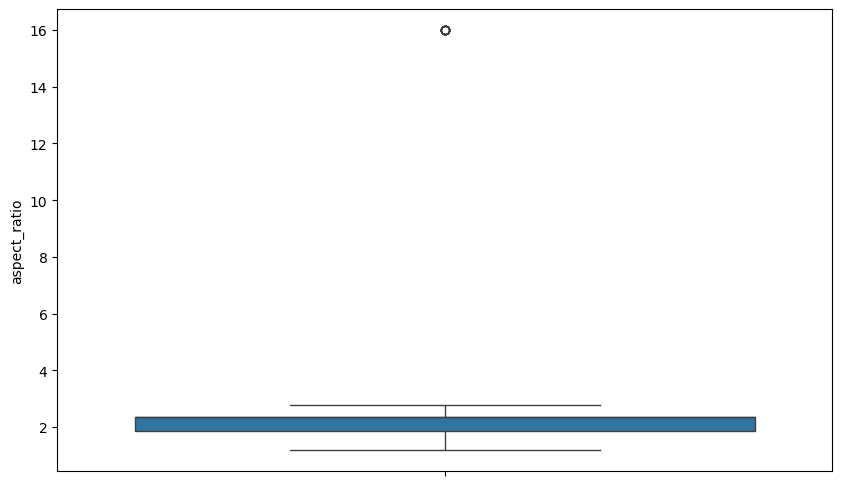

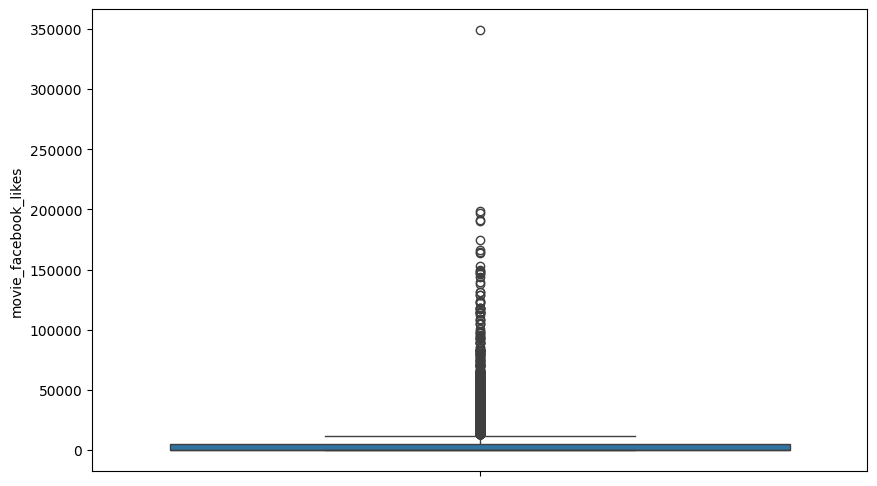

In [437]:
for i in numeric_var_names:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[i])
    plt.show()

In [438]:
# # Creating plot
# plt.boxplot(df['num_critic_for_reviews'] )

# # show plot
# plt.show()

In [439]:
#         # IQR

# Q1 = df['num_critic_for_reviews'].quantile(0.25)
# Q3 = df['num_critic_for_reviews'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# lower_bound , upper_bound

In [440]:
# df.num_critic_for_reviews = df.num_critic_for_reviews.clip(lower_bound , upper_bound)

In [441]:
# # Creating plot
# plt.boxplot(df['num_critic_for_reviews'] )

# # show plot
# plt.show()

# USING IQR

In [442]:
numeric_var_names = ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [443]:
for i in numeric_var_names:
            # IQR

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_bound , upper_bound

    df[i] = df[i].clip(lower_bound , upper_bound)

# AFTER TREATING OUTLIERS

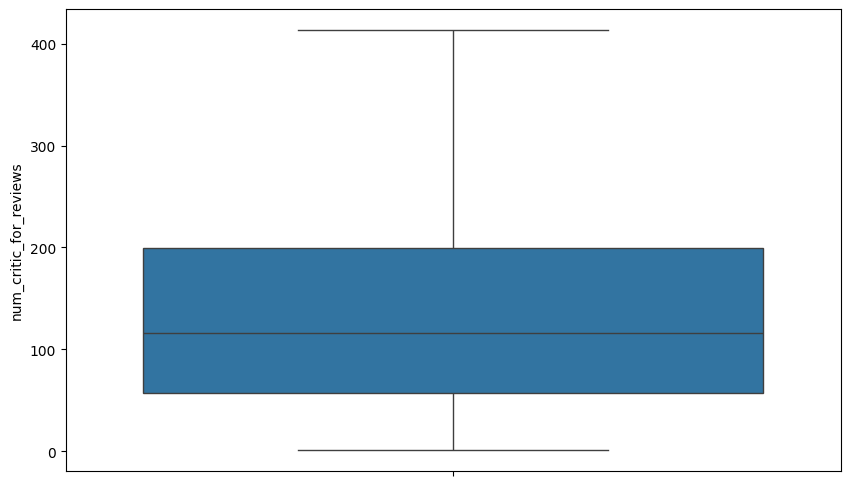

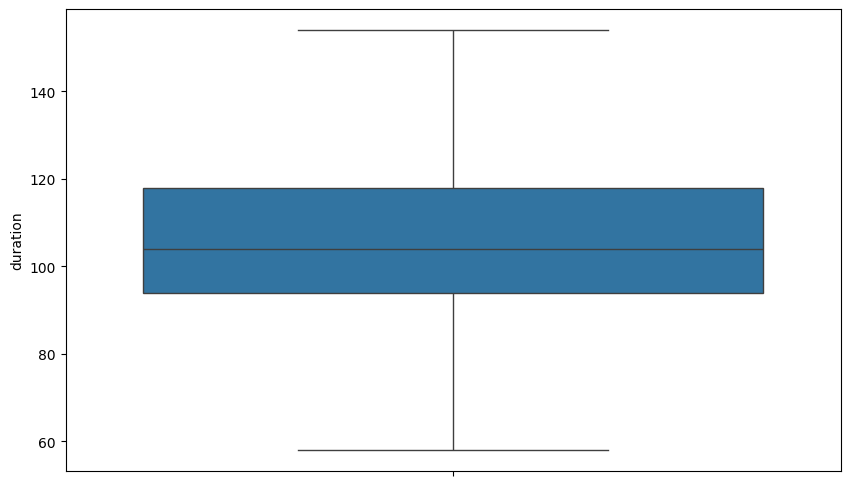

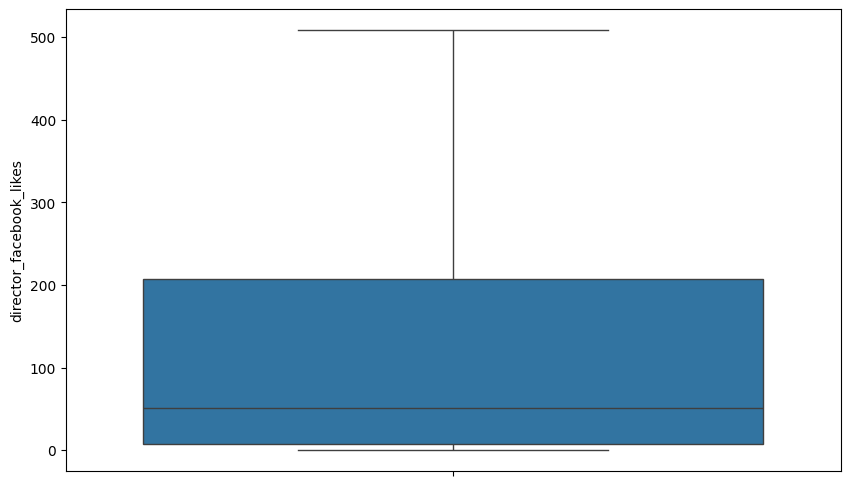

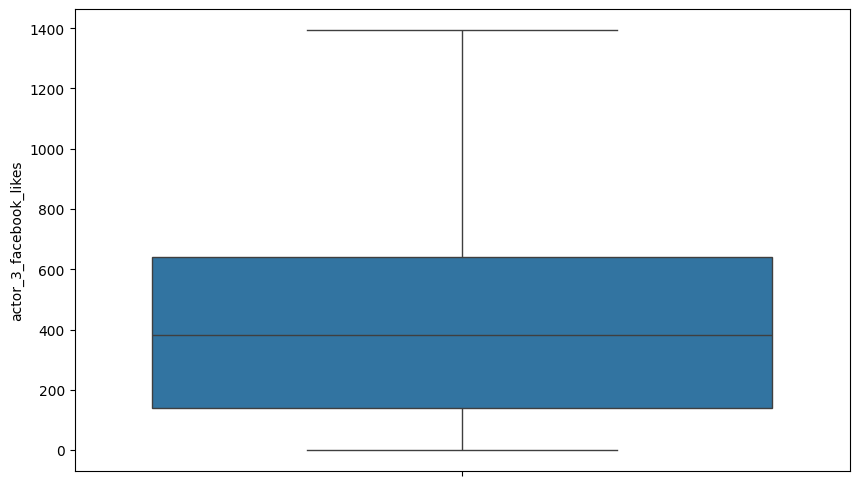

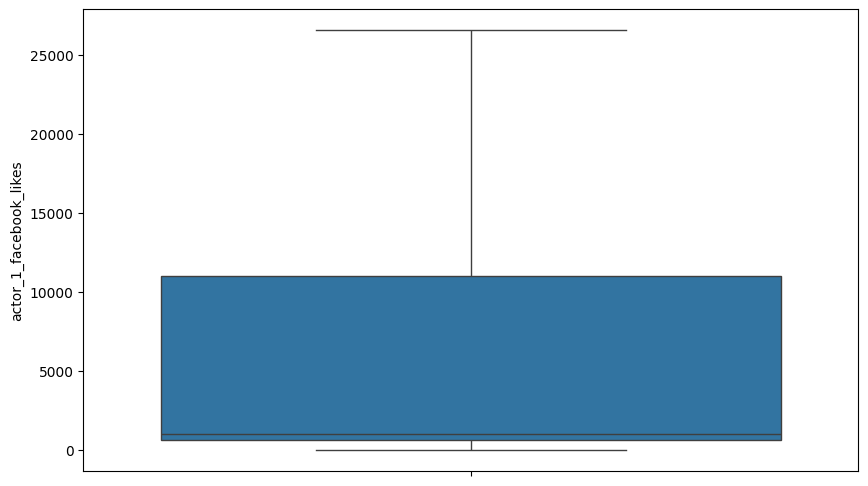

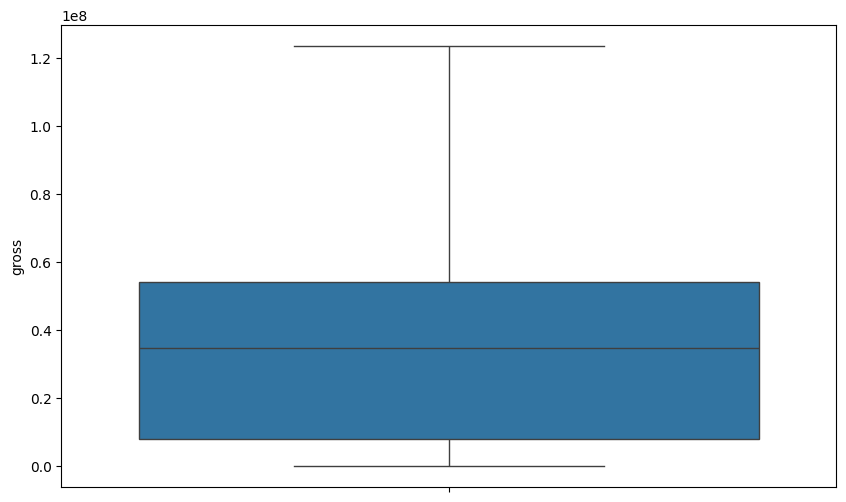

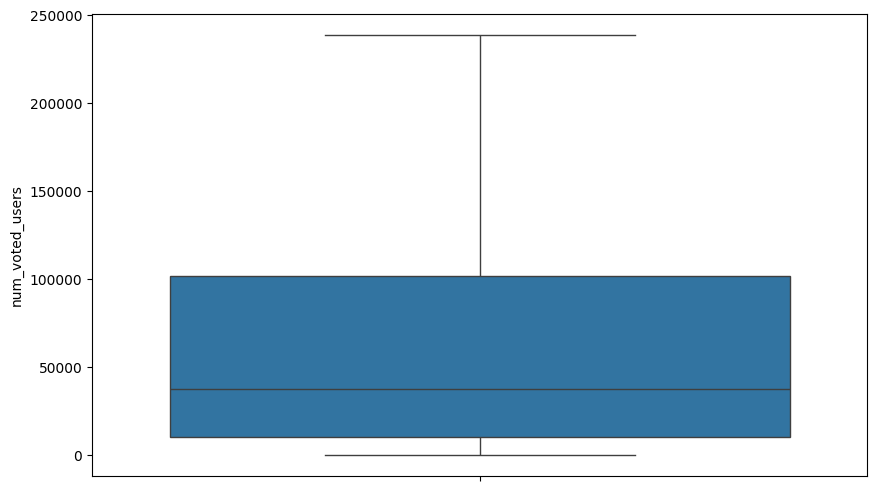

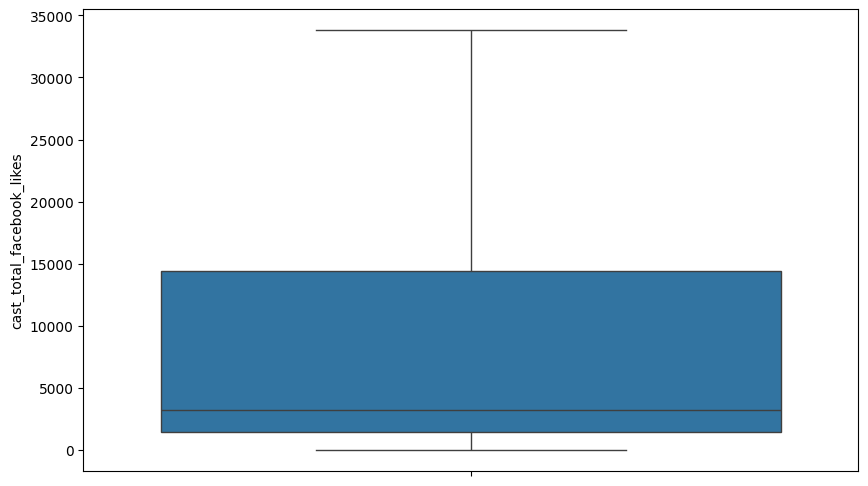

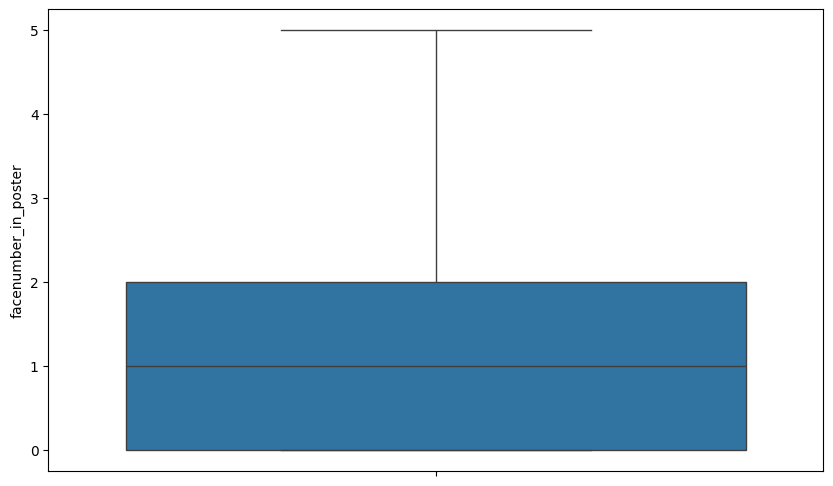

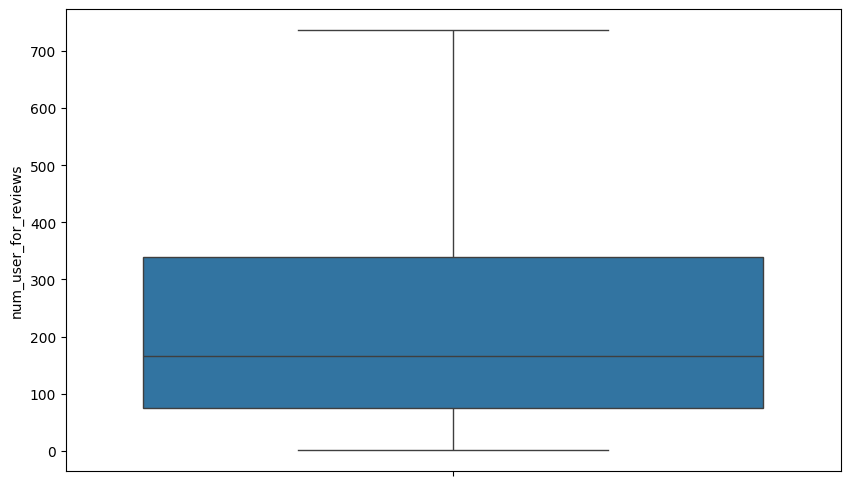

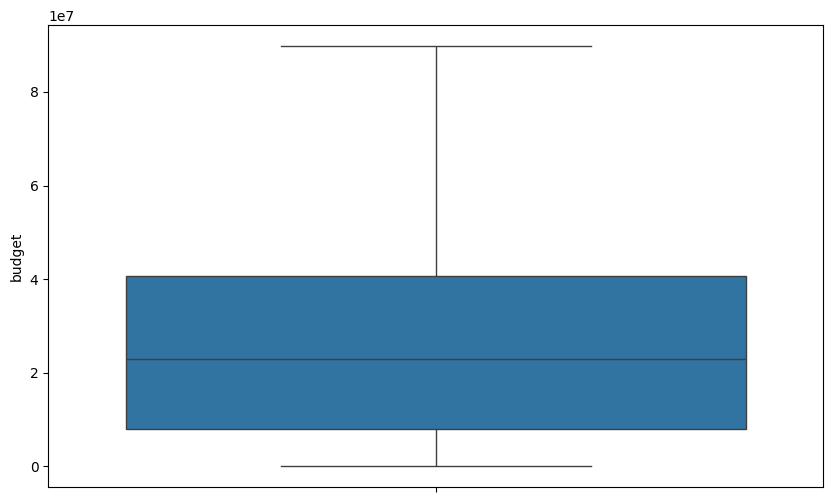

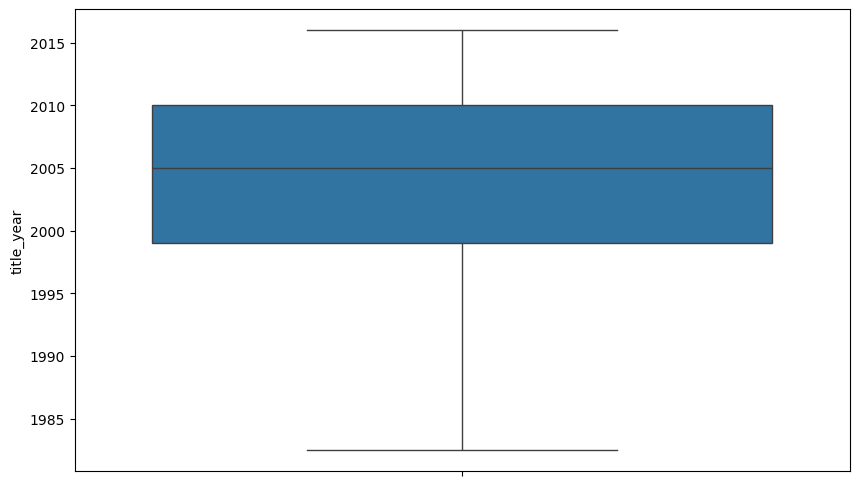

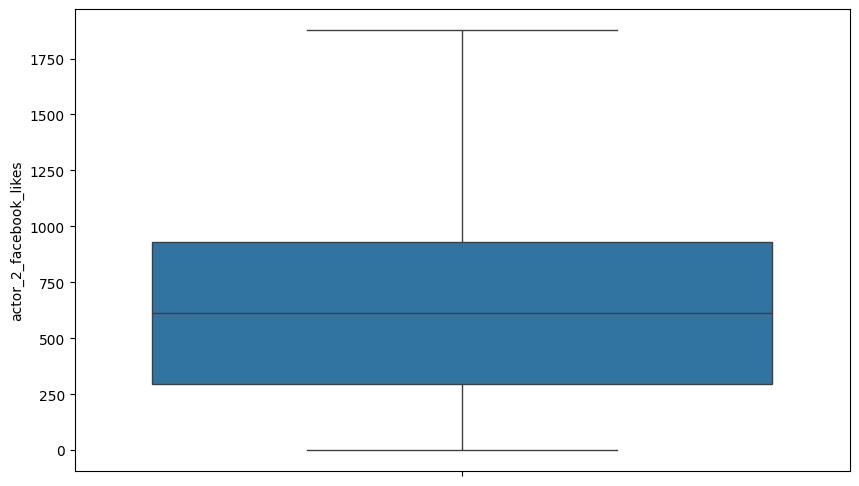

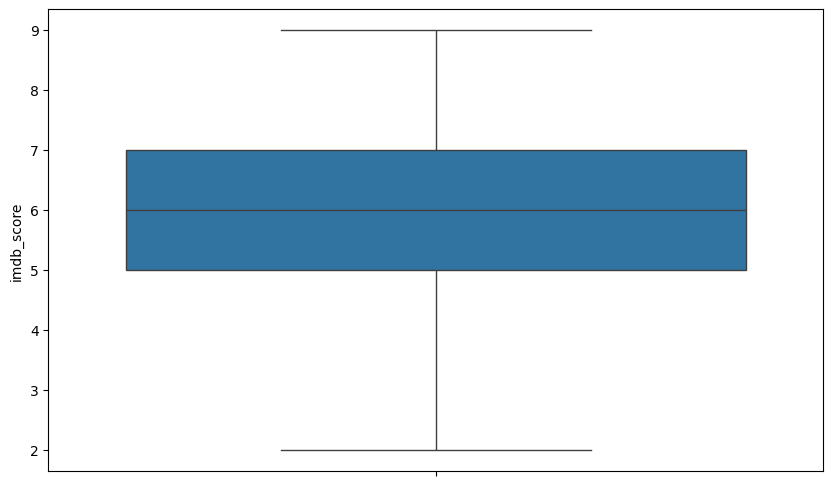

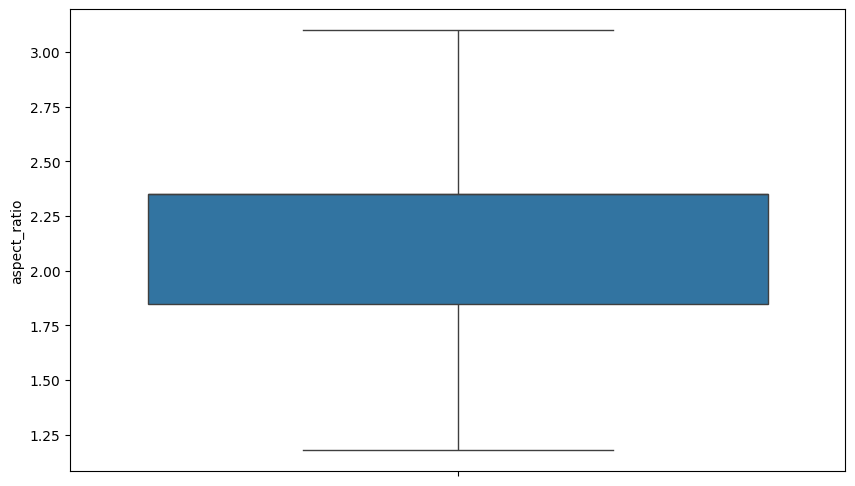

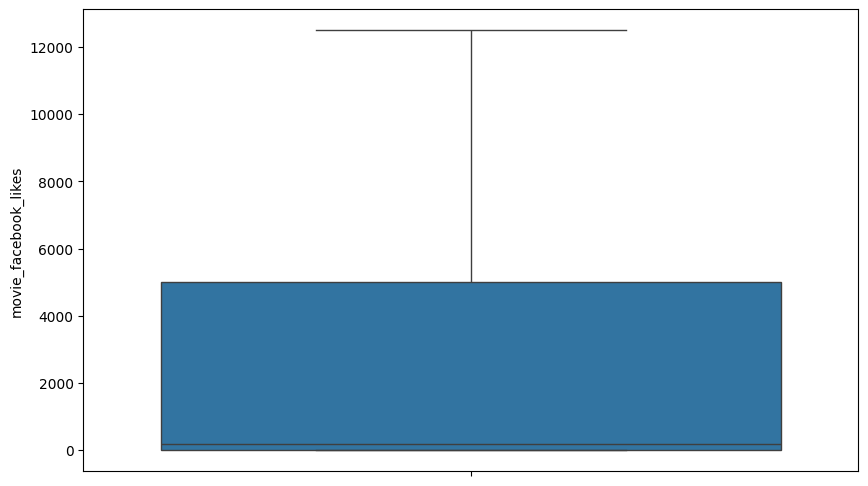

In [444]:
for i in numeric_var_names:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[i])
    plt.show()

In [458]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                  413.25     154.0   
1     Color     Gore Verbinski                  302.00     154.0   
2     Color         Sam Mendes                  413.25     148.0   
3     Color  Christopher Nolan                  413.25     154.0   
5     Color     Andrew Stanton                  413.25     132.0   
...     ...                ...                     ...       ...   
5035  Color   Robert Rodriguez                   56.00      81.0   
5036  Color    Anthony Vallone                  112.00      84.0   
5037  Color       Edward Burns                   14.00      95.0   
5038  Color        Scott Smith                    1.00      87.0   
5042  Color           Jon Gunn                   43.00      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                        0.00                   855.0    Joel David Moore   
1                      508.25                  1000.0       Orlando Bloom   
2                        0.00                   161.0        Rory Kinnear   
3                      508.25                  1393.5      Christian Bale   
5                      475.00                   530.0     Samantha Morton   
...                       ...                     ...                 ...   
5035                     0.00                     6.0     Peter Marquardt   
5036                     2.00                     2.0      John Considine   
5037                     0.00                   133.0  Caitlin FitzGerald   
5038                     2.00                   318.0       Daphne Zuniga   
5042                    16.00                    16.0    Brian Herzlinger   

      actor_1_facebook_likes         gross  \
0                       1000  1.234862e+08   
1                      26549  1.234862e+08   
2                      11000  1.234862e+08   
3                      26549  1.234862e+08   
5                        640  7.305868e+07   
...                      ...           ...   
5035                     121  2.040920e+06   
5036                      45  4.906555e+07   
5037                     296  4.584000e+03   
5038                     637  4.906555e+07   
5042                      86  8.522200e+04   

                                   genres  ... num_user_for_reviews language  \
0         Action|Adventure|Fantasy|Sci-Fi  ...                736.5  English   
1                Action|Adventure|Fantasy  ...                736.5  English   
2               Action|Adventure|Thriller  ...                736.5  English   
3                         Action|Thriller  ...                736.5  English   
5                 Action|Adventure|Sci-Fi  ...                736.5  English   
...                                   ...  ...                  ...      ...   
5035  Action|Crime|Drama|Romance|Thriller  ...                130.0  Spanish   
5036                          Crime|Drama  ...                  1.0  English   
5037                         Comedy|Drama  ...                 14.0  English   
5038                         Comedy|Drama  ...                  6.0  English   
5042                          Documentary  ...                 84.0  English   

      country  content_rating        budget  title_year  \
0         USA           PG-13  8.979579e+07      2009.0   
1         USA           PG-13  8.979579e+07      2007.0   
2          UK           PG-13  8.979579e+07      2015.0   
3         USA           PG-13  8.979579e+07      2012.0   
5         USA           PG-13  8.979579e+07      2012.0   
...       ...             ...           ...         ...   
5035      USA               R  7.000000e+03      1992.0   
5036      USA           PG-13  3.250000e+03      2005.0   
5037      USA       Not Rated  9.000000e+03      2011.0   
5038   Canada        Approved  4.071832e+07      2013.0   
5042      USA              PG  1.100000e+03      2004.0   

     actor_2_facebook_likes imdb_score  a

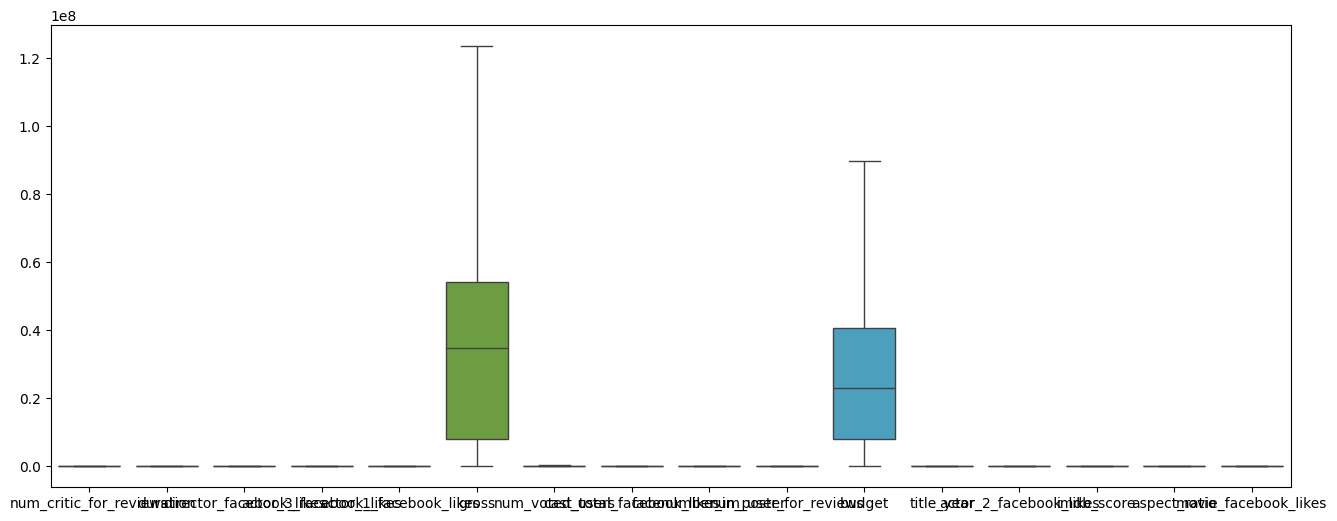

In [459]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

# Correlation Matrix

In [462]:
# correlation matrix (ranges from 1 to -1)
corrm=df[numeric_var_names].corr()
corrm.to_csv('corrm.csv')
corrm

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.273377   
duration                                 0.273377  1.000000   
director_facebook_likes                  0.248658  0.250674   
actor_3_facebook_likes                   0.274054  0.163936   
actor_1_facebook_likes                   0.337557  0.214495   
gross                                    0.374678  0.232052   
num_voted_users                          0.728131  0.370052   
cast_total_facebook_likes                0.351735  0.222642   
facenumber_in_poster                    -0.053804  0.024907   
num_user_for_reviews                     0.700111  0.379083   
budget                                   0.397137  0.301894   
title_year                               0.366953 -0.108695   
actor_2_facebook_likes                   0.317293  0.187872   
imdb_score                               0.323489  0.365281   
aspect_ratio                             0.184873  0.194167   
movie_facebook_likes                     0.647866  0.219881   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.248658                0.274054   
duration                                  0.250674                0.163936   
director_facebook_likes                   1.000000                0.107832   
actor_3_facebook_likes                    0.107832                1.000000   
actor_1_facebook_likes                    0.179462                0.501776   
gross                                     0.160444                0.290893   
num_voted_users                           0.279581                0.325780   
cast_total_facebook_likes                 0.179831                0.631663   
facenumber_in_poster                     -0.011030                0.128395   
num_user_for_reviews                      0.265588                0.285253   
budget                                    0.172041                0.309587   
title_year                               -0.060138                0.128966   
actor_2_facebook_likes                    0.139784                0.798716   
imdb_score                                0.207353               -0.003879   
aspect_ratio                              0.043984                0.097017   
movie_facebook_likes                      0.170085                0.201687   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.337557  0.374678         0.728131   
duration                                 0.214495  0.232052         0.370052   
director_facebook_likes                  0.179462  0.160444         0.279581   
actor_3_facebook_likes                   0.501776  0.290893         0.325780   
actor_1_facebook_likes                   1.000000  0.227522         0.388482   
gross                                    0.227522  1.000000         0.603744   
num_voted_users                          0.388482  0.603744         1.000000   
cast_total_facebook_likes                0.962009  0.260808         0.406187   
facenumber_in_poster                     0.086544 -0.029227        -0.034186   
num_user_for_reviews                     0.309657  0.480557         0.842885   
budget                                   0.296707  0.530238         0.439510   
title_year                               0.134951 -0.000999         0.043994   
actor_2_facebook_likes                   0.614390  0.297940         0.365448   
imdb_score                               0.146867  0.129923         0.431324   
aspect_ratio                             0.137307  0.084346         0.109585   
movie_facebook_likes                     0.255167  0.256388         0.547719   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.351735             -0.053804   
duration                                    0.222642              0.024907   
director_facebook_likes          

# Heatmap

<Axes: >

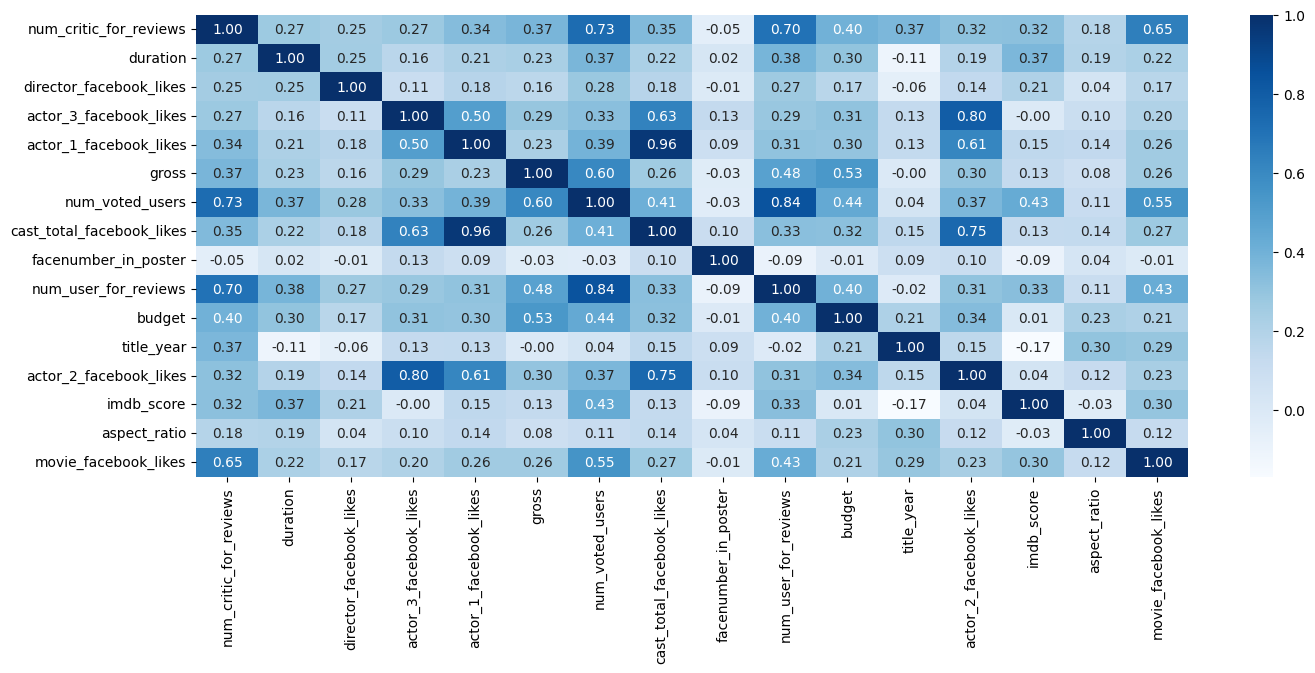

In [469]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

# Normality Check

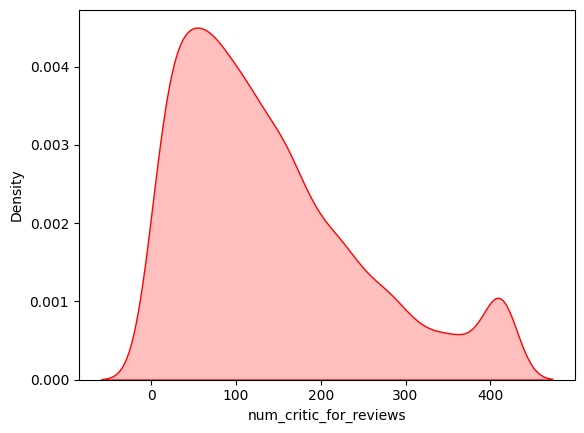

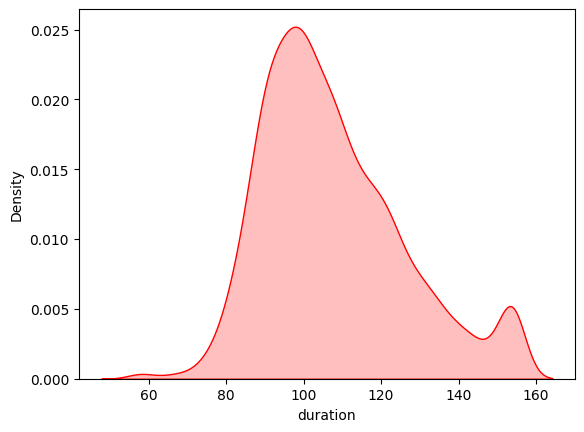

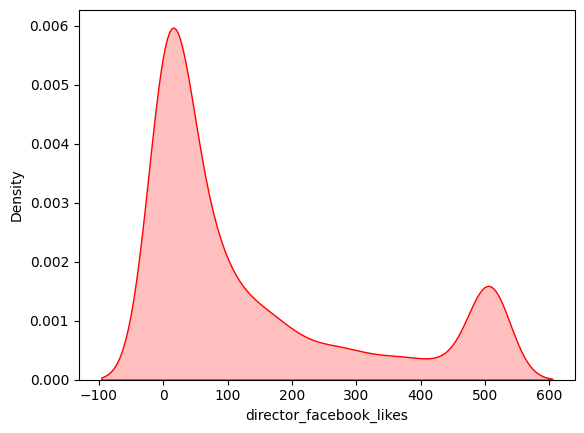

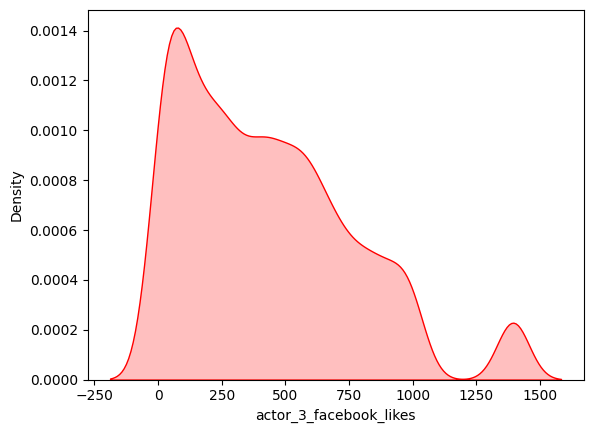

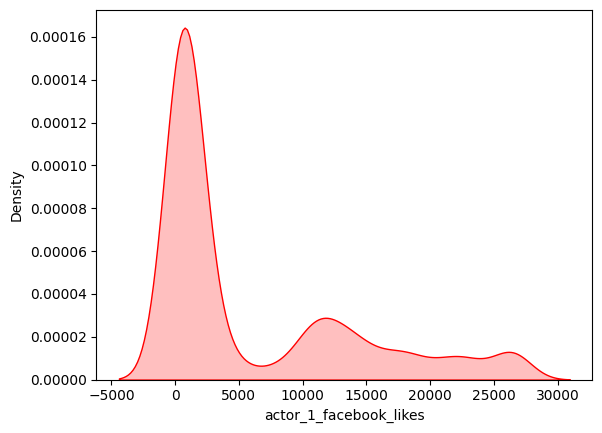

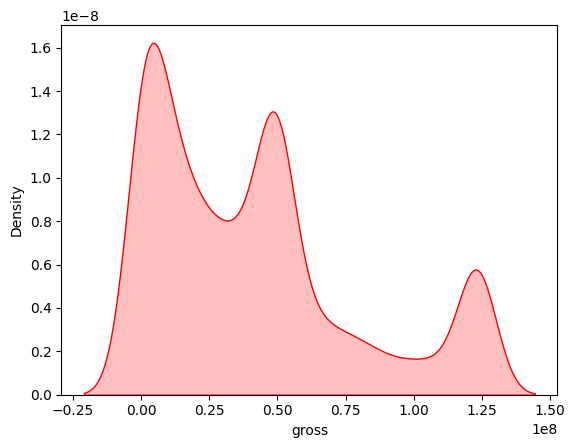

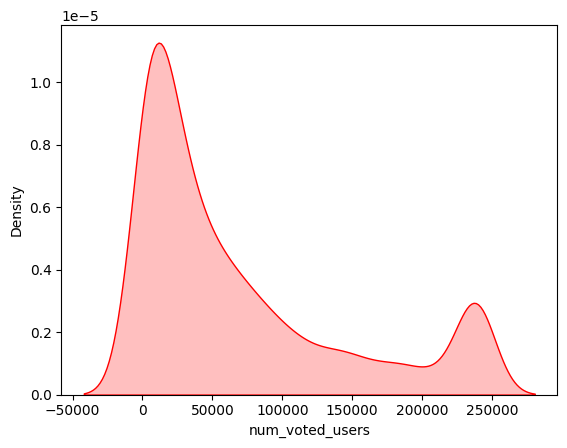

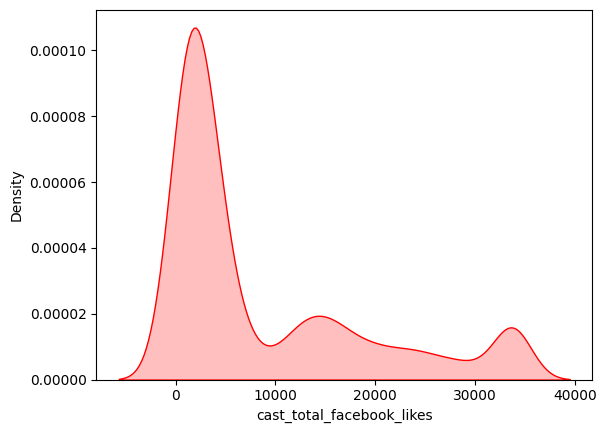

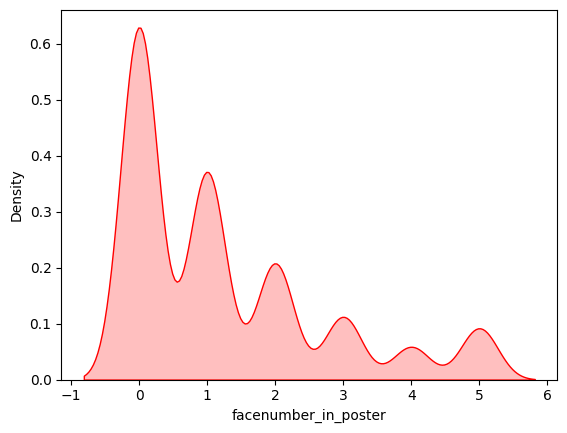

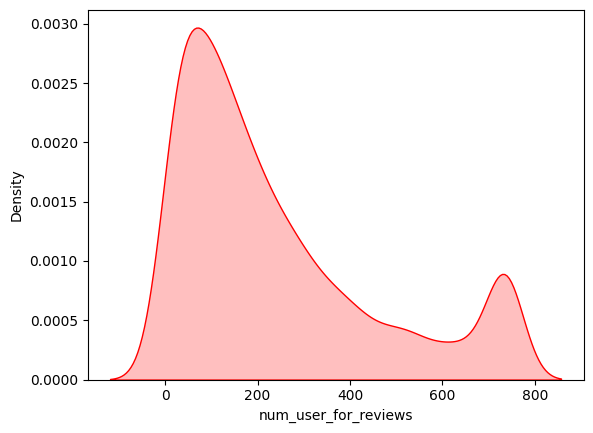

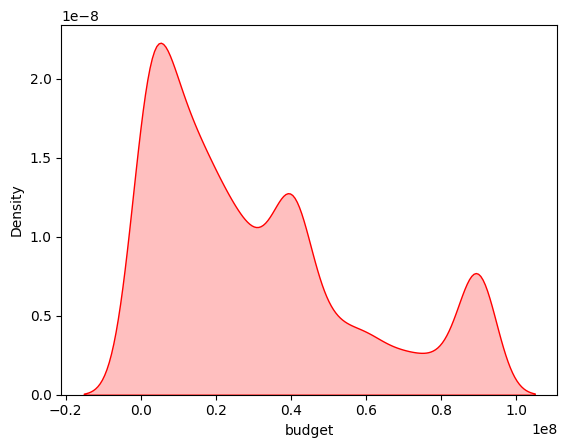

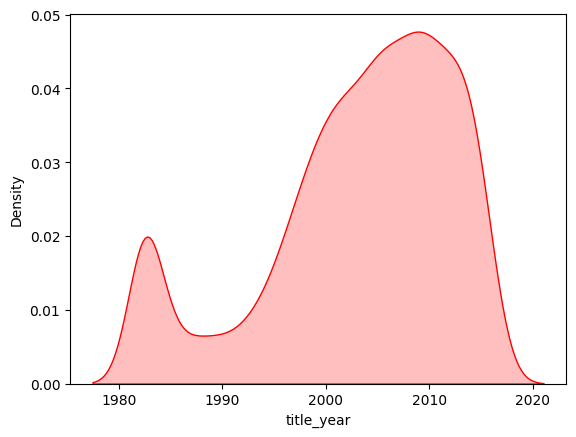

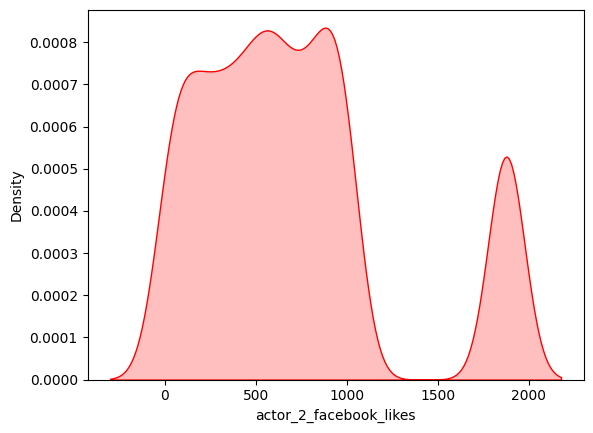

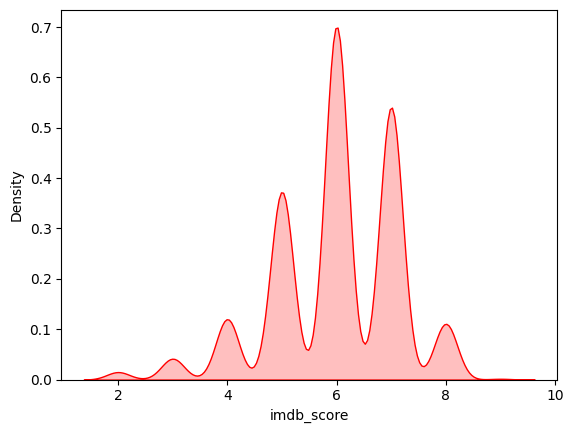

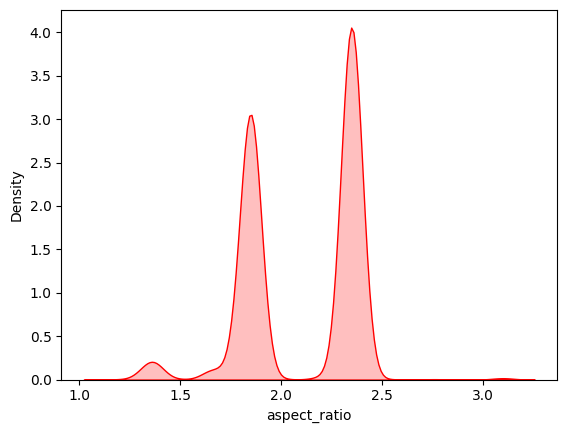

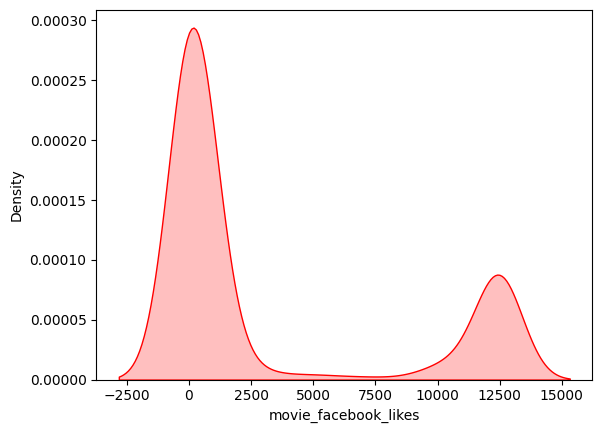

In [467]:
for i in numeric_var_names:
    sns.kdeplot(data=df[i],fill=True,color="red")
    plt.show()

# To Save the Data as CSV

In [473]:
df.to_csv('final_imdb_movies.csv', index=False)